In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test = pd.read_csv("/content/drive/MyDrive/Kaggle/rossmann-store-sales/test.csv")
train = pd.read_csv("/content/drive/MyDrive/Kaggle/rossmann-store-sales/train.csv")
store = pd.read_csv("/content/drive/MyDrive/Kaggle/rossmann-store-sales/store.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/Kaggle/rossmann-store-sales/sample_submission.csv")

<ipython-input-3-65faa389258c>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/drive/MyDrive/Kaggle/rossmann-store-sales/train.csv")


In [12]:
import warnings
warnings.filterwarnings("ignore")

from pandas import datetime
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Í∏∞Ïà†ÌÜµÍ≥Ñ Î∞è Ï∂îÏ†ï (7)

 [‚úîÔ∏è] Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤¥ Íµ¨Ï°∞ ÌååÏïÖ (Î≥ÄÏàòÏùò Ï¢ÖÎ•ò, Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞ Îì±) \
 [‚úîÔ∏è] Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞ (ÌèâÍ∑†, Ï§ëÏïôÍ∞í, Î∂ÑÏÇ∞, ÌëúÏ§ÄÌé∏Ï∞® Îì±) \
 [‚úîÔ∏è] Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌÉêÏÉâ (Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï, ÏôúÎèÑ Î∞è Ï≤®ÎèÑ Î∂ÑÏÑù) \
 [‚úîÔ∏è] Ïù¥ÏÉÅÏπò ÌÉêÏÉâ Î∞è Ï≤òÎ¶¨ \
 [‚úîÔ∏è] Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Ï≤òÎ¶¨ \
 [‚úîÔ∏è] ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù \
 [‚úîÔ∏è] ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ (ÌûàÏä§ÌÜ†Í∑∏Îû®, Î∞ïÏä§ÌîåÎ°Ø, ÏÇ∞Ï†êÎèÑ Îì±) \



### 1.1 Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï†ÑÏ≤¥ Íµ¨Ï°∞ ÌååÏïÖ
- Î≥ÄÏàòÏùò Ï¢ÖÎ•ò, Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞ Îì±

In [ ]:
sample_submission.sample(3)

Id  Sales
41066  41067      0
25983  25984      0
12794  12795      0

In [ ]:
store.sample(3)

Store StoreType Assortment  CompetitionDistance  \
754    755         d          c              13130.0   
856    857         c          a               6270.0   
737    738         d          c               5980.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
754                       12.0                    2003.0       0   
856                        8.0                    2005.0       1   
737                       10.0                    2005.0       0   

     Promo2SinceWeek  Promo2SinceYear     PromoInterval  
754              NaN              NaN               NaN  
856             23.0           2014.0  Mar,Jun,Sept,Dec  
737              NaN              NaN               NaN

In [ ]:
train.sample(3)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
532559    375          2  2014-03-11   6492        663     1      0   
937812    883          3  2013-03-13   4106        453     1      0   
78472     423          5  2015-05-22  12275       2046     1      1   

       StateHoliday  SchoolHoliday  
532559            0              0  
937812            0              0  
78472             0              0

In [ ]:
test.sample(3)

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
8036  8037    430          2  2015-09-08   1.0      0            0   
7078  7079    301          3  2015-09-09   1.0      0            0   
1975  1976    342          2  2015-09-15   1.0      1            0   

      SchoolHoliday  
8036              1  
7078              0  
1975              0

In [ ]:
test.shape, train.shape, store.shape, sample_submission.shape

((41088, 8), (1017209, 12), (1115, 10), (41088, 2))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Short description:
- Sales: the turnover for any given day (target variable).
- Customers: the number of customers on a given day.
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.
- Promo: indicates whether a store is running a promo on that day.
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

### 1.2 Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ Í≥ÑÏÇ∞
- ÌèâÍ∑†, Ï§ëÏïôÍ∞í, Î∂ÑÏÇ∞, ÌëúÏ§ÄÌé∏Ï∞® Îì±

In [ ]:
train.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [ ]:
train["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
train[train["StateHoliday"] == 0].count()

Store            131072
DayOfWeek        131072
Date             131072
Sales            131072
Customers        131072
Open             131072
Promo            131072
StateHoliday     131072
SchoolHoliday    131072
dtype: int64

In [ ]:
train[train["StateHoliday"] == "0"].count()

Store            855087
DayOfWeek        855087
Date             855087
Sales            855087
Customers        855087
Open             855087
Promo            855087
StateHoliday     855087
SchoolHoliday    855087
dtype: int64

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨, Ï†ïÏàòÌôî
train["StateHoliday"] = train["StateHoliday"].replace({"0" : 0, "a": 1, "b" : 2, "c": 3})
train["StateHoliday"].value_counts()

0    986159
1     20260
2      6690
3      4100
Name: StateHoliday, dtype: int64

In [26]:
# Date
train["Day"] = pd.to_datetime(train["Date"]).dt.day

In [27]:
train["Month"] = pd.to_datetime(train["Date"]).dt.month
train["Year"] = pd.to_datetime(train["Date"]).dt.year
train_1 = train.drop(columns=["Date"])

In [29]:
# 'Date' Ïó¥ÏùÑ Datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
train['Date'] = pd.to_datetime(train['Date'])

# 'Date' Ïó¥ÏóêÏÑú Ï£ºÏ∞® Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÏó¨ ÏÉàÎ°úÏö¥ Ïó¥Î°ú Ï†ÄÏû•
train['WeekOfYear'] = train['Date'].dt.isocalendar().week

In [30]:
train.drop(columns=["Date"], inplace=True)

In [ ]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   Store          1017209 non-null  int64
 1   DayOfWeek      1017209 non-null  int64
 2   Sales          1017209 non-null  int64
 3   Customers      1017209 non-null  int64
 4   Open           1017209 non-null  int64
 5   Promo          1017209 non-null  int64
 6   StateHoliday   1017209 non-null  int64
 7   SchoolHoliday  1017209 non-null  int64
 8   Day            1017209 non-null  int64
 9   Month          1017209 non-null  int64
 10  Year           1017209 non-null  int64
dtypes: int64(11)
memory usage: 85.4 MB


In [ ]:
store.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [ ]:
store.sample(3)

Store StoreType Assortment  CompetitionDistance  \
696    697         d          a               3780.0   
560    561         d          a              14300.0   
31      32         a          a               2910.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
696                        NaN                       NaN       1   
560                        NaN                       NaN       0   
31                         NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
696             40.0           2011.0  Jan,Apr,Jul,Oct  
560              NaN              NaN              NaN  
31              45.0           2009.0  Feb,May,Aug,Nov

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

### 1.3 Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ ÌÉêÏÉâ
- Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï, ÏôúÎèÑ Î∞è Ï≤®ÎèÑ Î∂ÑÏÑù

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Îç∞Ïù¥ÌÑ∞ ÏòàÏãú

# Min-Max Ï†ïÍ∑úÌôî
min_max_scaler = MinMaxScaler()
train_norm = min_max_scaler.fit_transform(train_1)
print("Min-Max Ï†ïÍ∑úÌôî Í≤∞Í≥º:\n", train_norm)

# Z-Ï†êÏàò Ï†ïÍ∑úÌôî
standard_scaler = StandardScaler()
train_z = standard_scaler.fit_transform(train_1)
print("Z-Ï†êÏàò Ï†ïÍ∑úÌôî Í≤∞Í≥º:\n", train_z)

Min-Max Ï†ïÍ∑úÌôî Í≤∞Í≥º:
 [[0.00000000e+00 6.66666667e-01 1.26663618e-01 ... 1.00000000e+00
  5.45454545e-01 1.00000000e+00]
 [8.97666068e-04 6.66666667e-01 1.45941133e-01 ... 1.00000000e+00
  5.45454545e-01 1.00000000e+00]
 [1.79533214e-03 6.66666667e-01 2.00091454e-01 ... 1.00000000e+00
  5.45454545e-01 1.00000000e+00]
 ...
 [9.98204668e-01 1.66666667e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99102334e-01 1.66666667e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.66666667e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Z-Ï†êÏàò Ï†ïÍ∑úÌôî Í≤∞Í≥º:
 [[-1.73164032  0.50148416 -0.13268286 ...  1.74076566  0.3467243
   1.50207687]
 [-1.72853385  0.50148416  0.07537318 ...  1.74076566  0.3467243
   1.50207687]
 [-1.72542738  0.50148416  0.65980026 ...  1.74076566  0.3467243
   1.50207687]
 ...
 [ 1.72275751 -1.00047591 -1.49972273 ... -1.67312281 -1.45719295
  -1.07061593]
 [ 1.72586398 -1.00

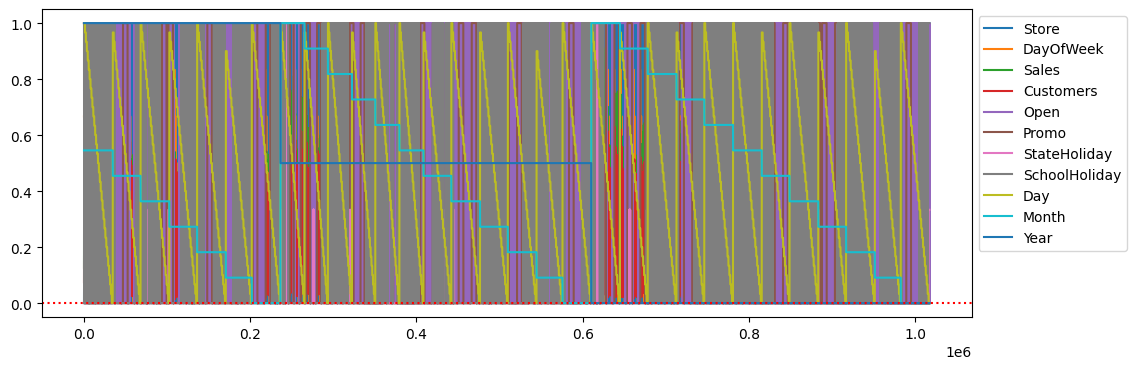

In [ ]:
train_norm = pd.DataFrame(train_norm, columns=train_1.columns)
train_norm.plot(figsize=(12, 4))
plt.legend(bbox_to_anchor=(1,1))
plt.axhline(0, ls=":", c="r")
plt.show()

In [ ]:
train_norm

Store  DayOfWeek     Sales  Customers  Open  Promo  StateHoliday  \
0        0.000000   0.666667  0.126664   0.075122   1.0    1.0      0.000000   
1        0.000898   0.666667  0.145941   0.084597   1.0    1.0      0.000000   
2        0.001795   0.666667  0.200091   0.111126   1.0    1.0      0.000000   
3        0.002693   0.666667  0.336815   0.202761   1.0    1.0      0.000000   
4        0.003591   0.666667  0.116050   0.075663   1.0    1.0      0.000000   
...           ...        ...       ...        ...   ...    ...           ...   
1017204  0.996409   0.166667  0.000000   0.000000   0.0    0.0      0.333333   
1017205  0.997307   0.166667  0.000000   0.000000   0.0    0.0      0.333333   
1017206  0.998205   0.166667  0.000000   0.000000   0.0    0.0      0.333333   
1017207  0.999102   0.166667  0.000000   0.000000   0.0    0.0      0.333333   
1017208  1.000000   0.166667  0.000000   0.000000   0.0    0.0      0.333333   

         SchoolHoliday  Day     Month  Year  
0                  1.0  1.0  0.545455   1.0  
1                  1.0  1.0  0.545455   1.0  
2                  1.0  1.0  0.545455   1.0  
3                  1.0  1.0  0.545455   1.0  
4                  1.0  1.0  0.545455   1.0  
...                ...  ...       ...   ...  
1017204            1.0  0.0  0.000000   0.0  
1017205            1.0  0.0  0.000000   0.0  
1017206            1.0  0.0  0.000000   0.0  
1017207            1.0  0.0  0.000000   0.0  
1017208            1.0  0.0  0.000000   0.0  

[1017209 rows x 11 columns]

In [ ]:
train_norm.plot(figsize=(12, 4))
plt.legend(bbox_to_anchor=(1,1))
plt.axhline(0, ls=":", c="r")
plt.show()

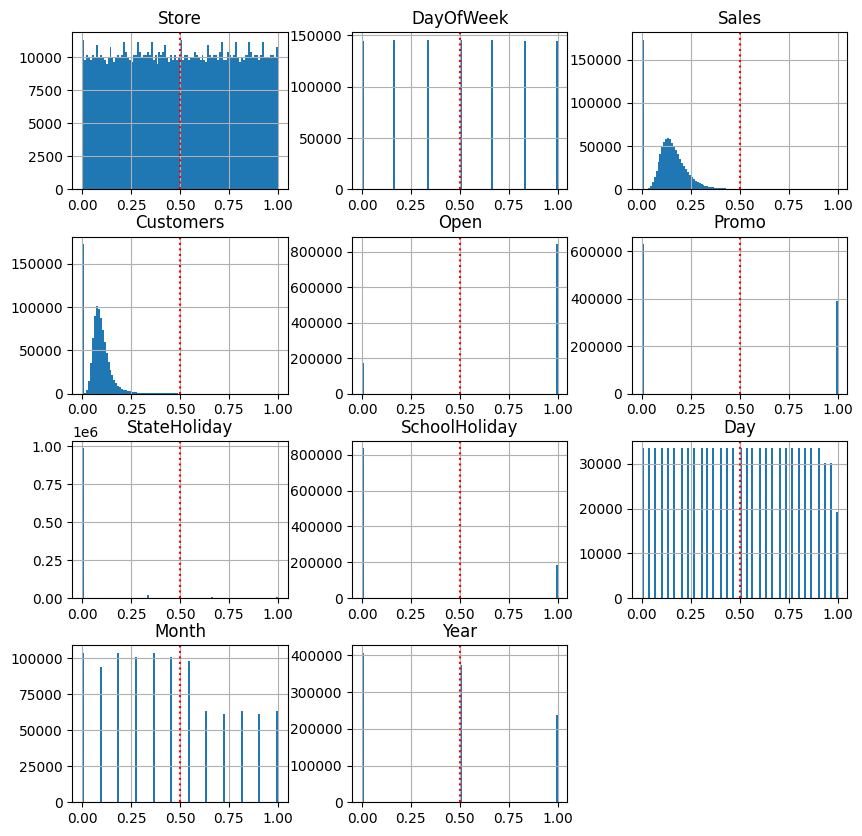

In [ ]:
axes = train_norm.hist(bins=100, figsize=(10, 10));

for ax in axes.flat:
  ax.axvline(0.5, c="r", ls=":")
plt.show()

- ÏôúÎèÑÏôÄ Ï≤®ÎèÑ

In [ ]:
train_norm.skew() # ÏôúÎèÑ

Store           -0.000955
DayOfWeek        0.001593
Sales            0.641460
Customers        1.598650
Open            -1.758045
Promo            0.487838
StateHoliday     7.464614
SchoolHoliday    1.677842
Day              0.008454
Month            0.274202
Year             0.300265
dtype: float64

In [ ]:
train_norm.kurt() # Ï≤®ÎèÑ

Store            -1.200524
DayOfWeek        -1.246873
Sales             1.778375
Customers         7.091773
Open              1.090723
Promo            -1.762018
StateHoliday     61.854897
SchoolHoliday     0.815154
Day              -1.192006
Month            -1.017876
Year             -1.290603
dtype: float64

### 1.4  Ïù¥ÏÉÅÏπò ÌÉêÏÉâ Î∞è Ï≤òÎ¶¨

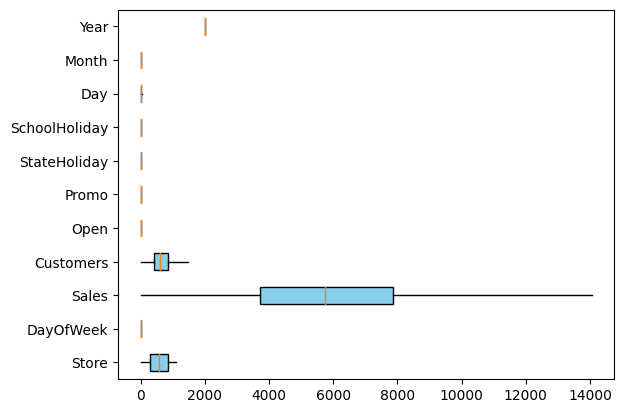

In [ ]:
numeric_cols = train_1.select_dtypes(include='number')

fig, ax = plt.subplots()
ax.boxplot(numeric_cols.values, vert=False, patch_artist=True, labels=numeric_cols.columns,
          showfliers = False, showcaps=False, boxprops = dict(facecolor="skyblue"))
plt.show()

<Axes: xlabel='Sales'>

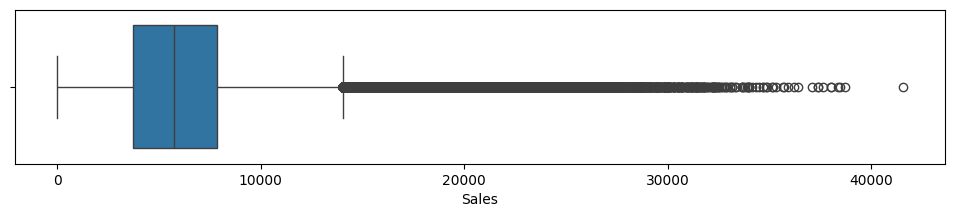

In [ ]:
plt.figure(figsize=(12,2))
sns.boxplot(data=train_1, x="Sales")

### 1.5  Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Ï≤òÎ¶¨

In [ ]:
store.isna().mean()

Store                        0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002691
CompetitionOpenSinceMonth    0.317489
CompetitionOpenSinceYear     0.317489
Promo2                       0.000000
Promo2SinceWeek              0.487892
Promo2SinceYear              0.487892
PromoInterval                0.487892
dtype: float64

In [ ]:
store.sample(3)

Store StoreType Assortment  CompetitionDistance  \
223    224         d          c               7930.0   
192    193         a          a                520.0   
345    346         a          c               8090.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
223                        NaN                       NaN       1   
192                        NaN                       NaN       0   
345                        NaN                       NaN       0   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
223              1.0           2013.0  Jan,Apr,Jul,Oct  
192              NaN              NaN              NaN  
345              NaN              NaN              NaN

In [ ]:
p2_store = store[store["Promo2"] == 1]

In [ ]:
train.isna().mean()

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
Day              0.0
Month            0.0
Year             0.0
dtype: float64

In [6]:
# closed stores
print(train[(train.Open == 0) & (train.Sales == 0)].shape)
train[(train.Open == 0) & (train.Sales == 0)].head()

(172817, 9)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
291     292          5  2015-07-31      0          0     0      1   
875     876          5  2015-07-31      0          0     0      1   
1406    292          4  2015-07-30      0          0     0      1   
1990    876          4  2015-07-30      0          0     0      1   
2521    292          3  2015-07-29      0          0     0      1   

     StateHoliday  SchoolHoliday  
291             0              1  
875             0              1  
1406            0              1  
1990            0              1  
2521            0              1

- 172817Í≥≥ ÌèêÏ†ê ÏÉÅÏ†ê.
- Ï†ÑÏ≤¥ 10%, Ìé∏Ìñ• ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ≠Ï†ú ÏöîÎßù

In [8]:
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total:", zero_sales.shape)
zero_sales.head()

In total: (54, 9)


Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
86825     971          5  2015-05-15      0          0     1      0   
142278    674          4  2015-03-26      0          0     1      0   
196938    699          4  2015-02-05      0          0     1      1   
322053    708          3  2014-10-01      0          0     1      1   
330176    357          1  2014-09-22      0          0     1      0   

       StateHoliday  SchoolHoliday  
86825             0              1  
142278            0              0  
196938            0              0  
322053            0              0  
330176            0              0

In [14]:
# missing values in CompetitionDistance
store[pd.isnull(store.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [15]:
# fill NaN with a median value (skewed distribuion)
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [16]:
# no promo Í∞Ä Î≠êÏßÄ..
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

In [17]:
# replace NA's by 0
store.fillna(0, inplace = True)

### 1.6  ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù



<AxesSubplot:>

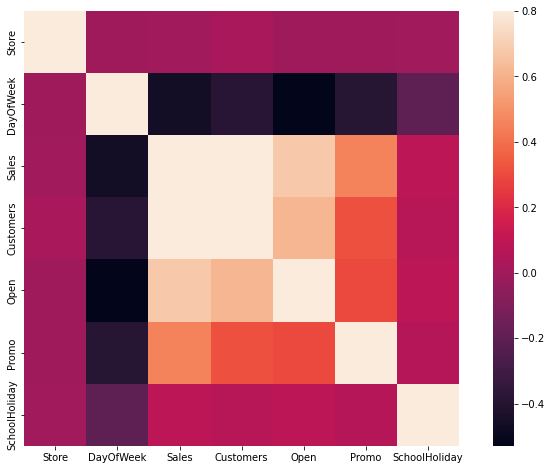

In [ ]:
numeric_cols = train.select_dtypes(include='number')
corrmat = numeric_cols.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

- 1.7 ÌõÑ Ï∂îÍ∞Ä

In [40]:
# stores which are opened on Sundays
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099])

In [41]:
# competition open time (in months)
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)

# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

Sales    Customers     PromoOpen  CompetitionOpen
StoreType                                                          
a           5738.179710   659.034880  12882.592255      7122.919204
b          10058.837334  1987.720846  17264.621605     11264.823310
c           5723.629246   673.265894  12128.625157      6737.717159
d           5641.819243   501.434892  10397.346995      9038.541369

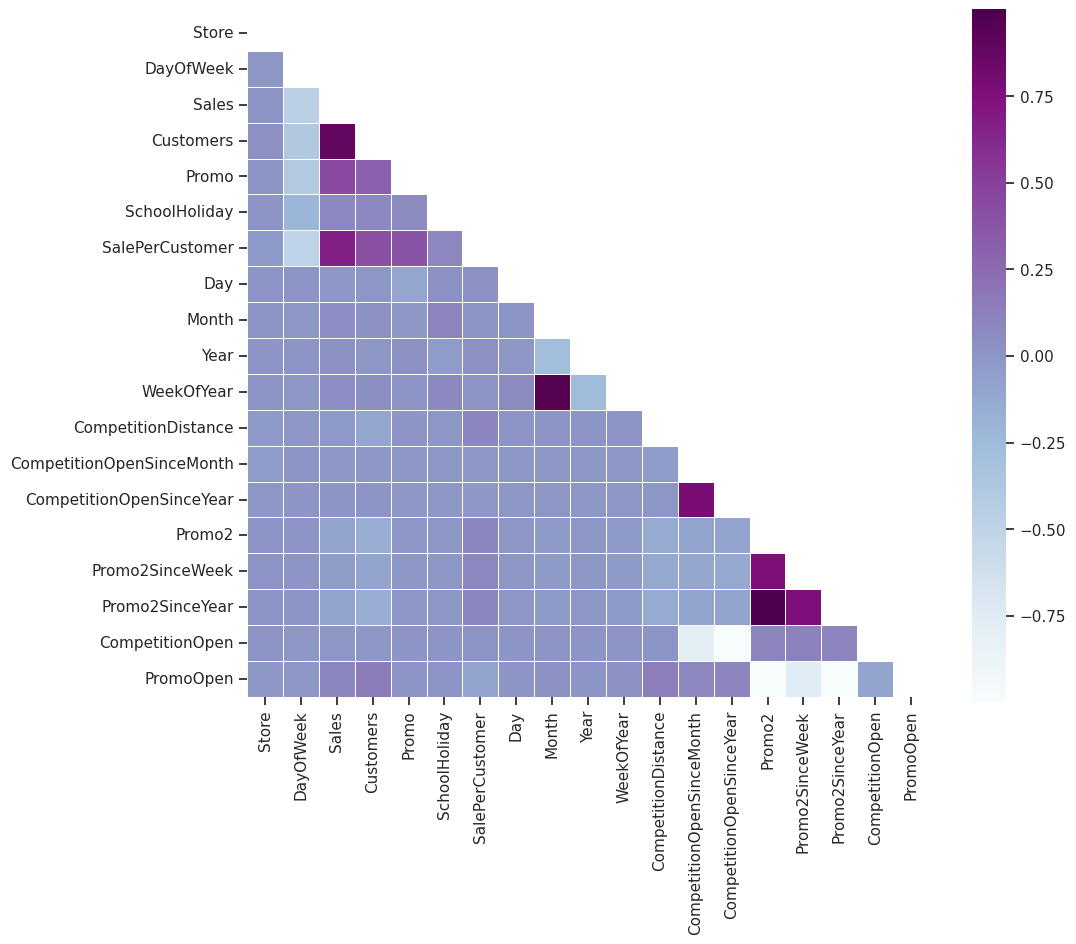

In [42]:
# Compute the correlation matrix
# exclude 'Open' variable
corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.show()

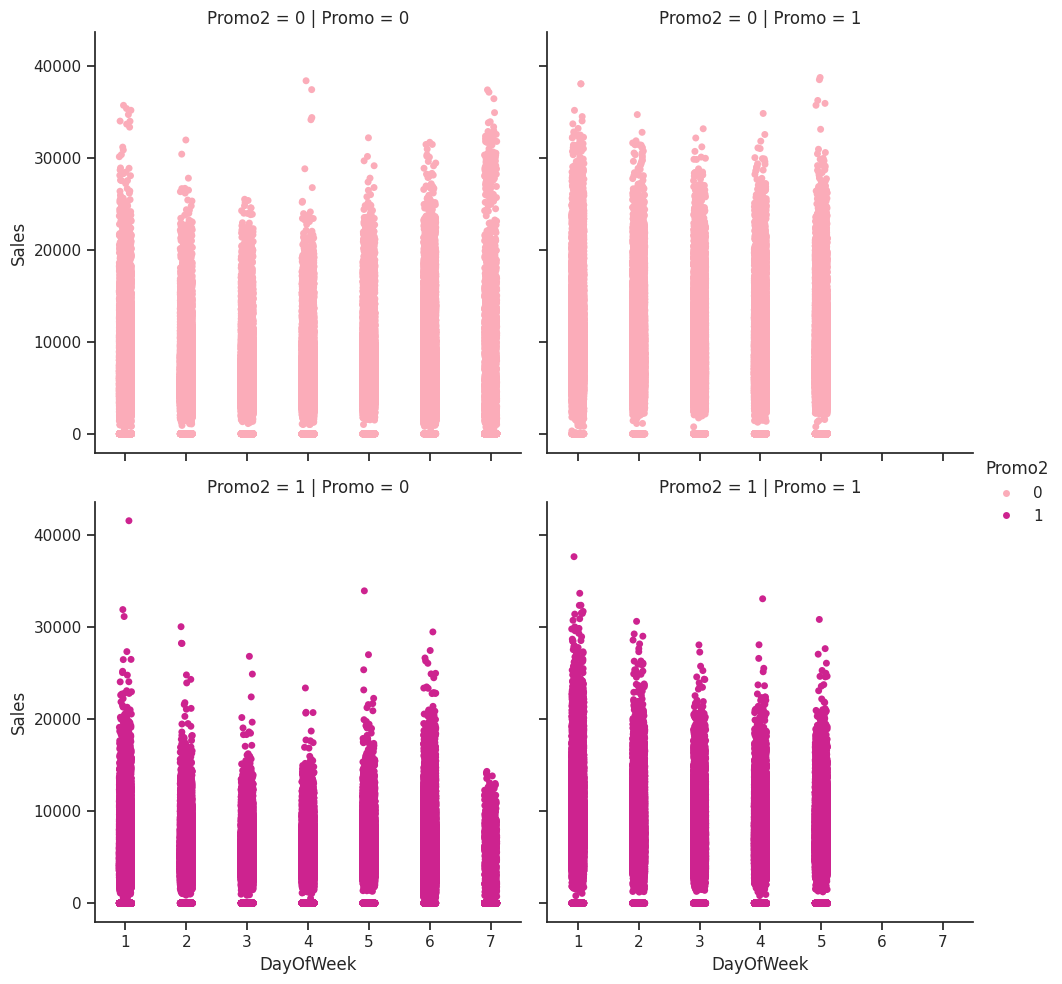

In [45]:
# sale per customer trends
sns.catplot(data = train_store, x = 'DayOfWeek', y = "Sales",
               col = 'Promo',
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu')

### 1.7 ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌïú Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ (ÌûàÏä§ÌÜ†Í∑∏Îû®, Î∞ïÏä§ÌîåÎ°Ø, ÏÇ∞Ï†êÎèÑ Îì±)

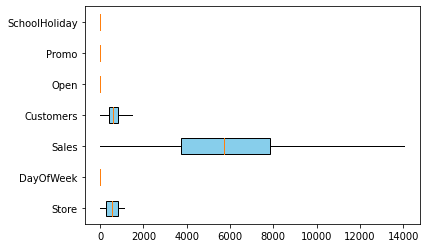

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(numeric_cols.values, vert=False, patch_artist=True, labels=numeric_cols.columns,
          showfliers = False, showcaps=False, boxprops = dict(facecolor="skyblue"))
plt.show()

<Axes: >

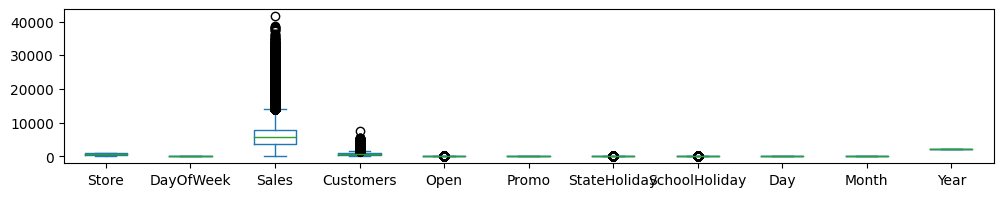

In [ ]:
train_1.plot(kind="box", figsize=(12,2))

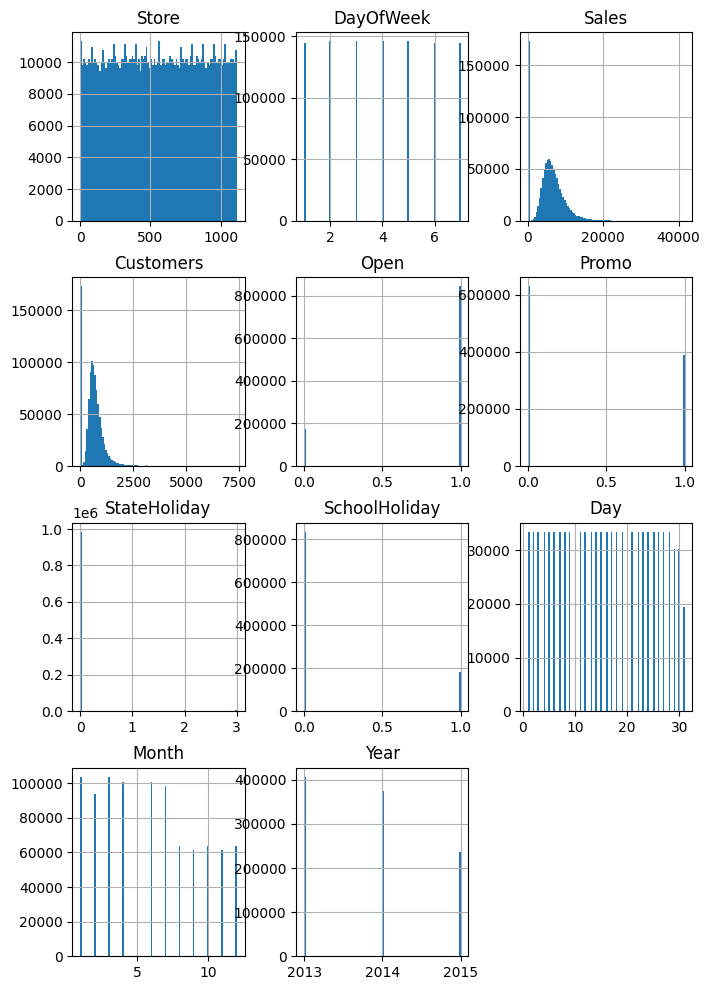

In [ ]:
train_1.hist(bins=100, figsize=(8,12));

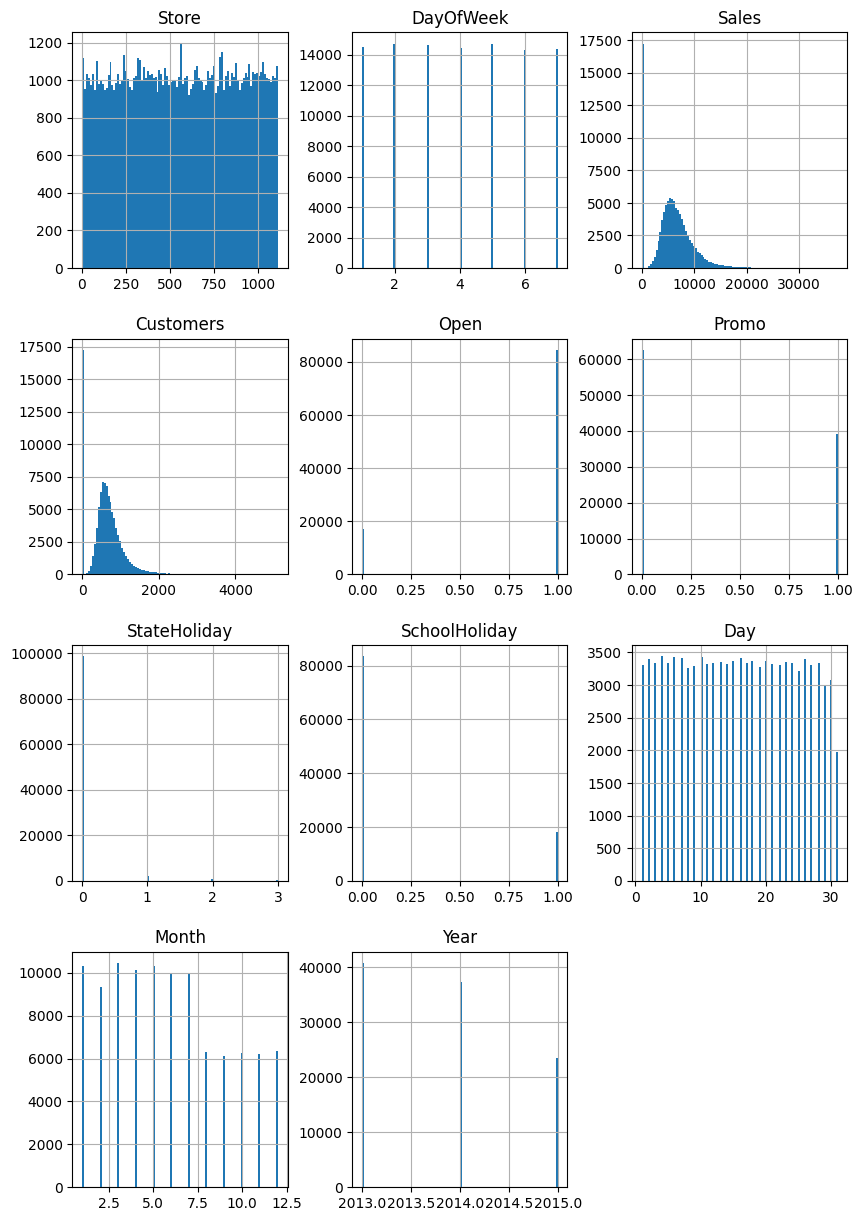

In [ ]:
train_1.sample(frac=0.1).hist(bins=100, figsize=(10,15));

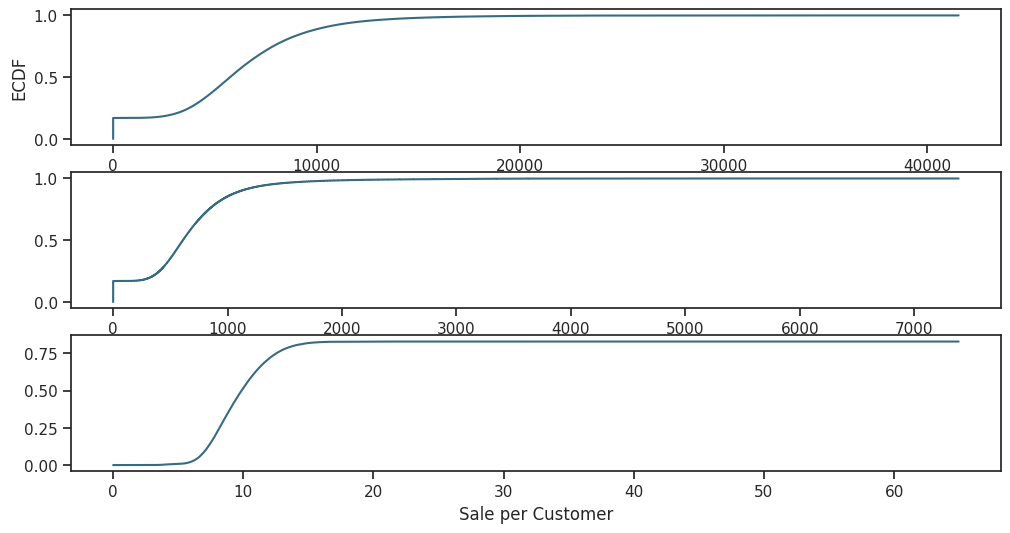

In [13]:
sns.set(style = "ticks")# to format into seaborn
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

plt.subplot(311)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

# plot second ECDF
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

# plot second ECDF
plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

In [32]:
print("Joining train set with an additional store information.")

# by specifying inner join we make sure that only those observations
# that are present in both train and store sets are merged together
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head()

Joining train set with an additional store information.
In total:  (1017209, 22)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday  SalePerCustomer  Day  ...  WeekOfYear  StoreType  \
0              1         9.482883   31  ...          31          c   
1              1         9.194139   30  ...          31          c   
2              1         9.143403   29  ...          31          c   
3              1         8.948214   28  ...          31          c   
4              1         9.970588   27  ...          31          c   

   Assortment CompetitionDistance CompetitionOpenSinceMonth  \
0           a              1270.0                       9.0   
1           a              1270.0                       9.0   
2           a              1270.0                       9.0   
3           a              1270.0                       9.0   
4           a              1270.0                       9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2008.0       0              0.0              0.0   
2                    2008.0       0              0.0              0.0   
3                    2008.0       0              0.0              0.0   
4                    2008.0       0              0.0              0.0   

   PromoInterval  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 22 columns]

In [33]:
# store types
train_store.groupby('StoreType')['Sales'].describe()

count          mean          std  min     25%     50%       75%  \
StoreType                                                                       
a          551627.0   5738.179710  3964.028134  0.0  3508.0  5618.0   7860.00   
b           15830.0  10058.837334  5280.525506  0.0  6227.0  9025.5  13082.75   
c          136840.0   5723.629246  3721.700886  0.0  3789.0  5766.0   7849.00   
d          312912.0   5641.819243  3473.393781  0.0  3986.0  5826.0   7691.00   

               max  
StoreType           
a          41551.0  
b          38722.0  
c          31448.0  
d          38037.0

In [34]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

Customers       Sales
StoreType                       
a          363541434  3165334859
b           31465621   159231395
c           92129705   783221426
d          156904995  1765392943

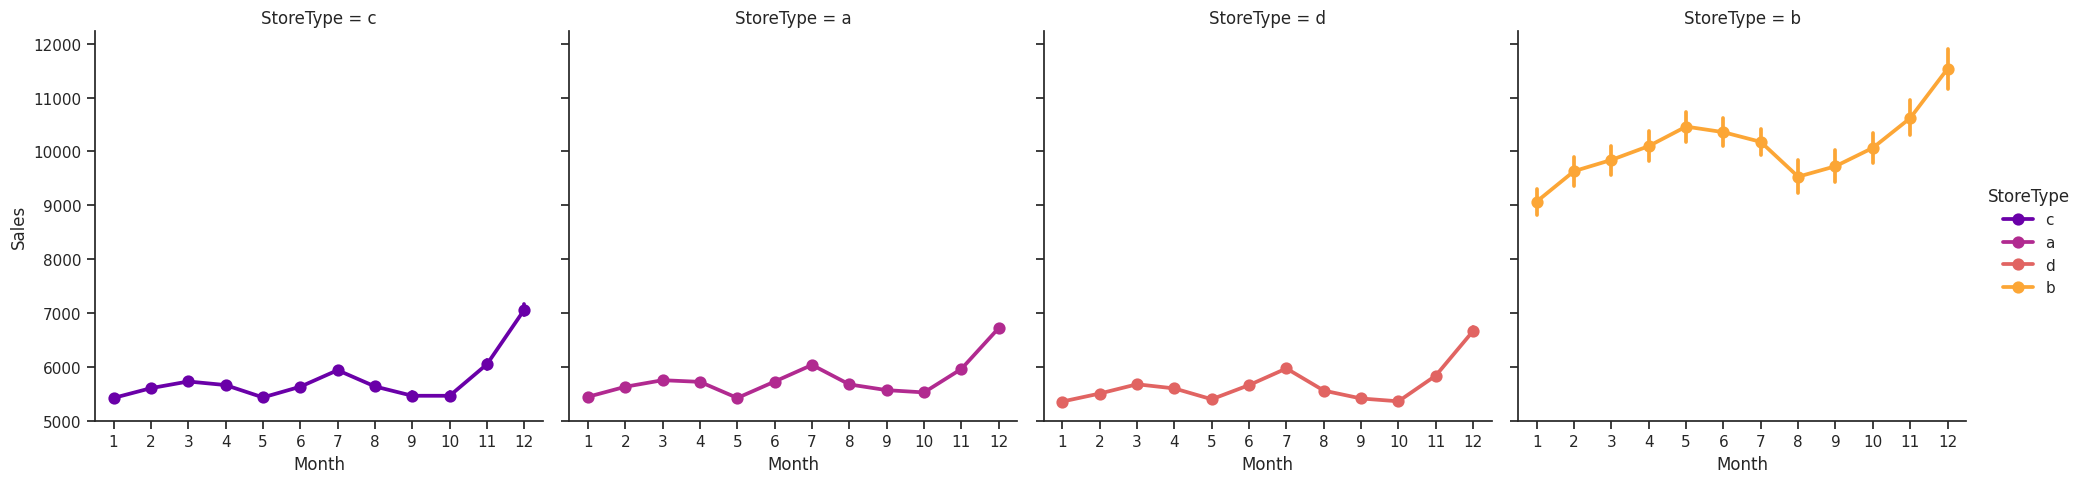

In [35]:
# sales trends
sns.catplot(data=train_store, x='Month', y="Sales",
            col='StoreType',  # per store type in cols
            palette='plasma',
            hue='StoreType',
            kind='point')  # ÏÇ¨Ïö©Ìï† Í∑∏ÎûòÌîÑ Ï¢ÖÎ•òÎ•º 'point', 'bar', 'strip', 'swarm', 'box', 'violin', ÎòêÎäî 'boxen' Ï§ëÏóêÏÑú ÏÑ†ÌÉù


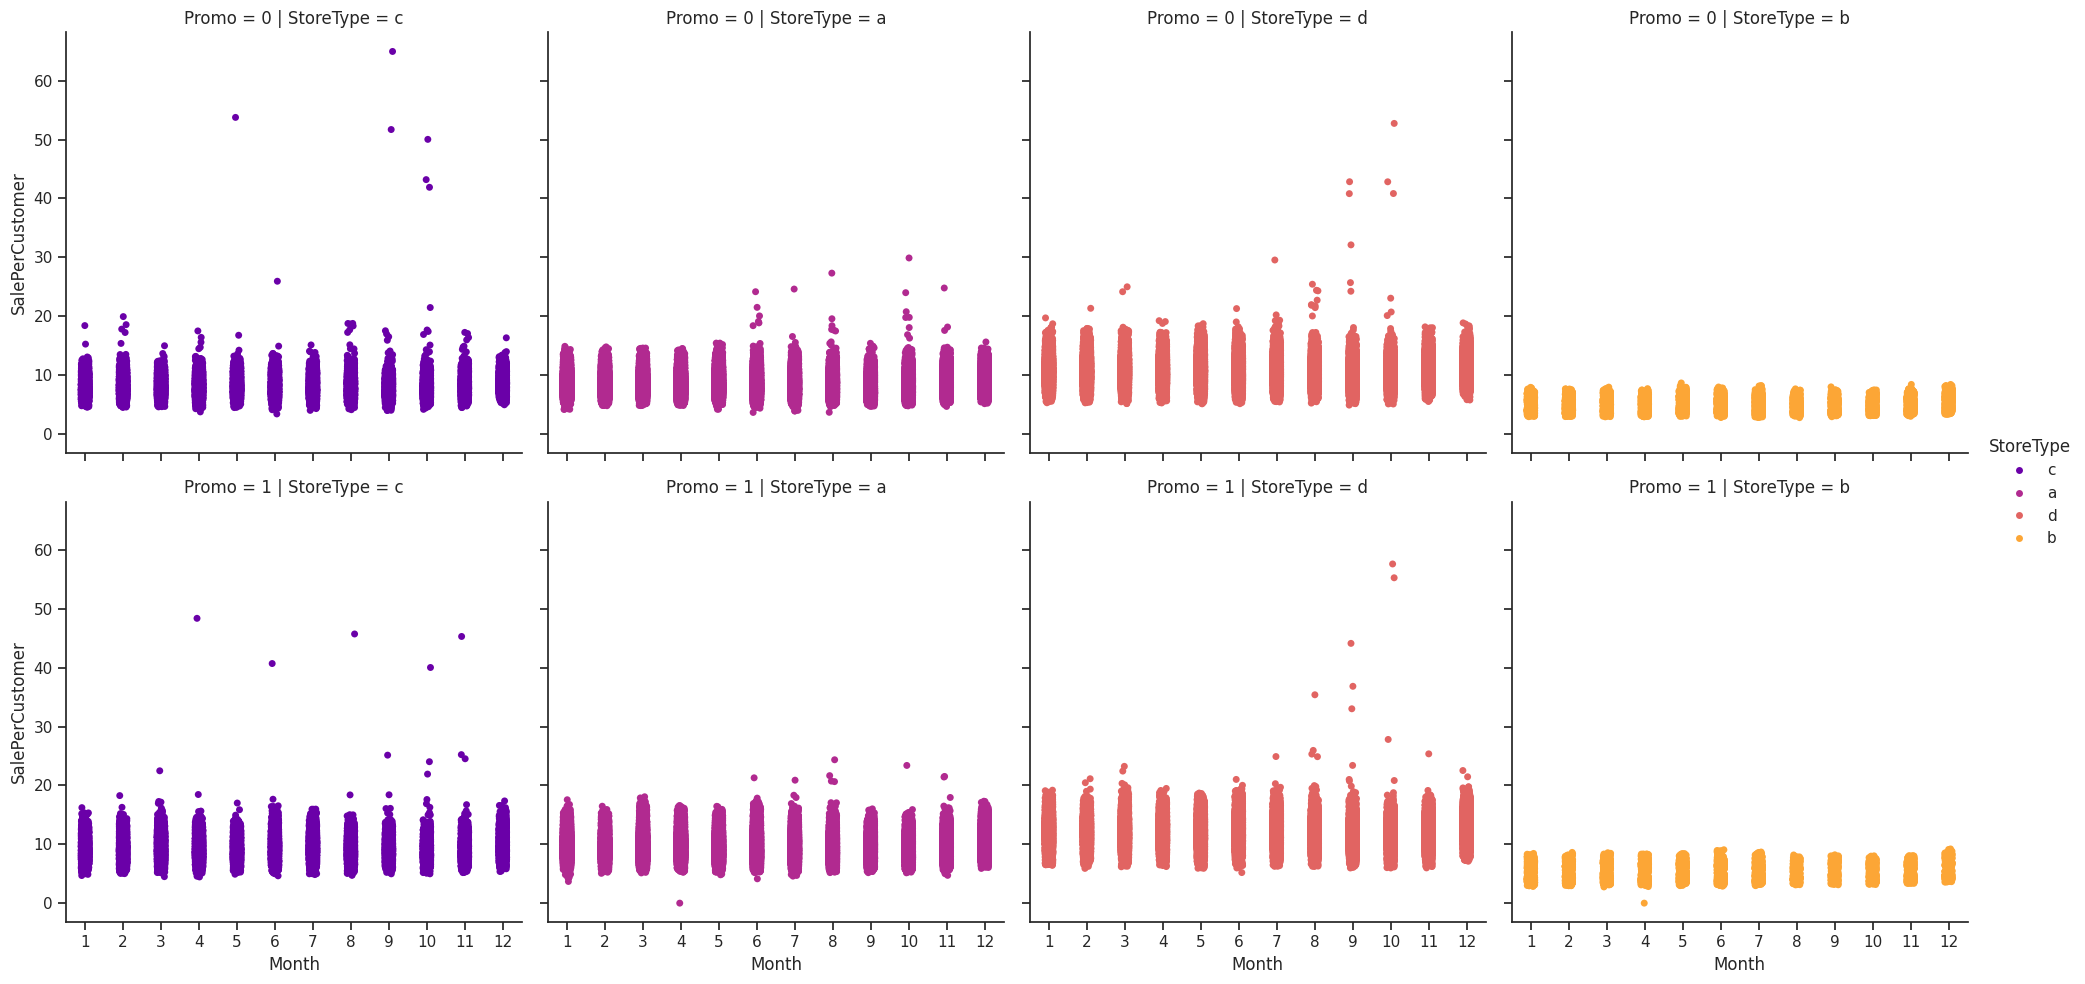

In [37]:
# sale per customer trends
sns.catplot(data = train_store, x = 'Month', y = "SalePerCustomer",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

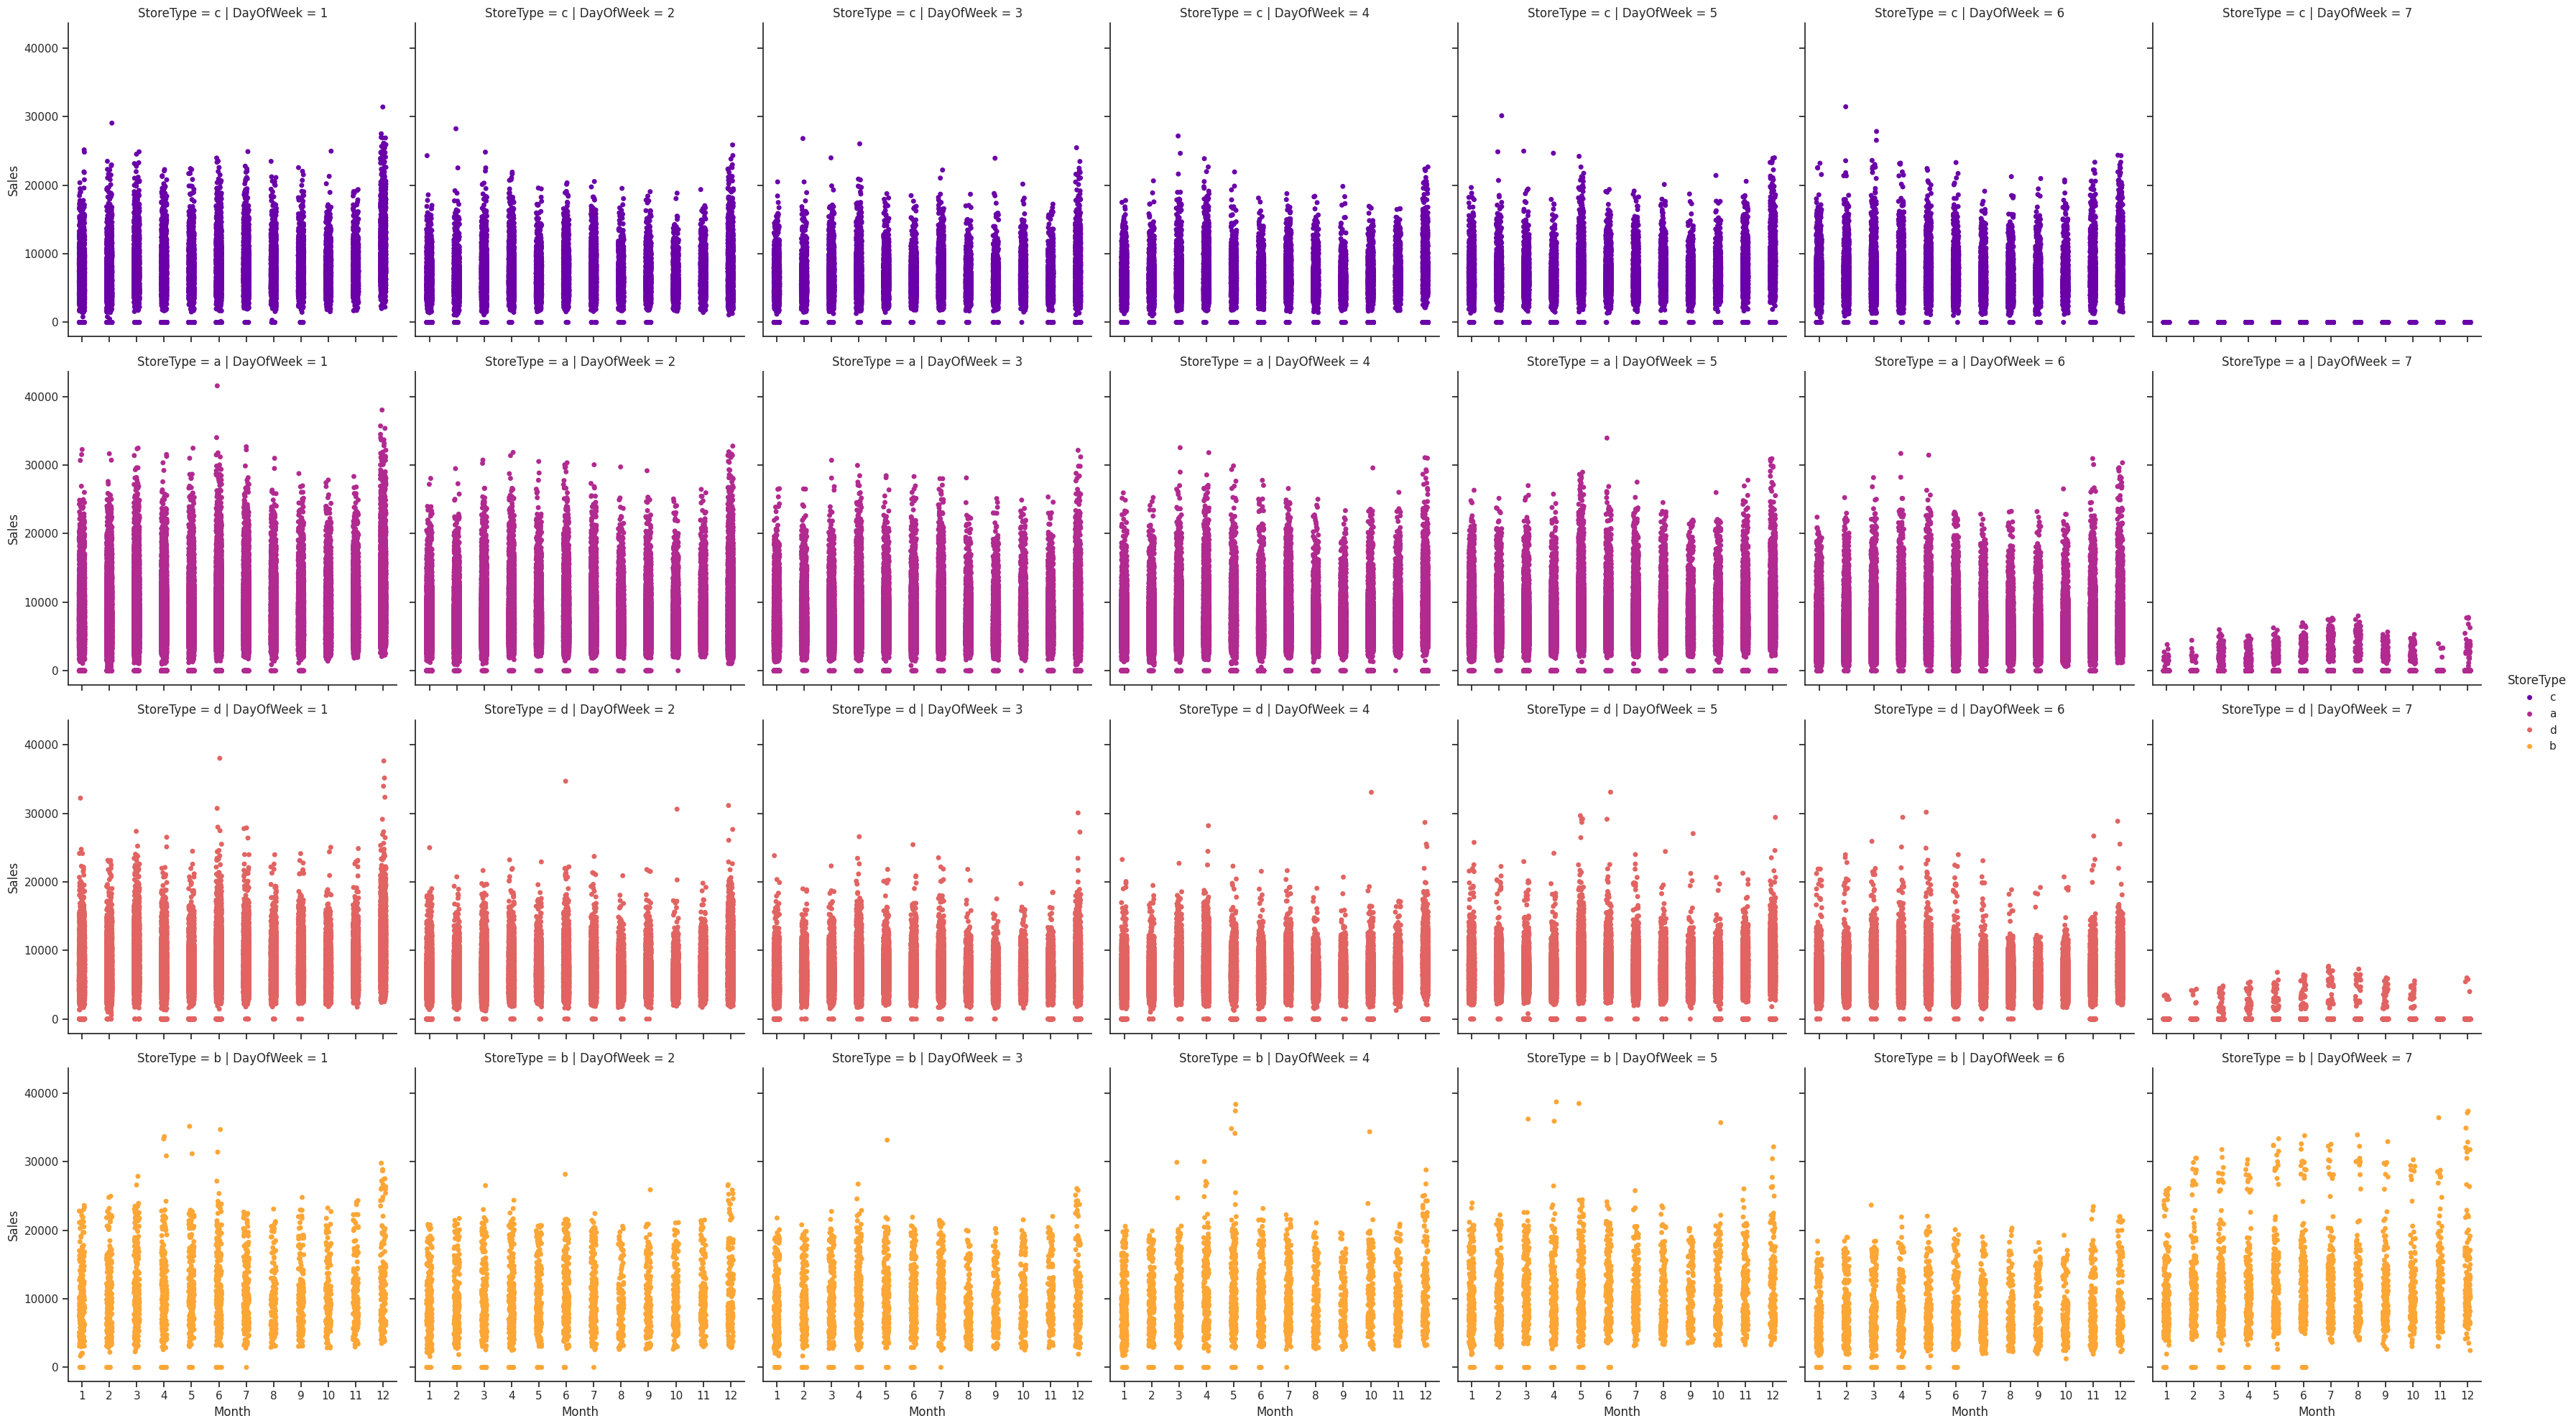

In [38]:
# customers
sns.catplot(data = train_store, x = 'Month', y = "Sales",
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = c)

# 2. Ï∂îÏ†ï (3)
[‚úîÔ∏è] Î™®ÏßëÎã®Ïùò ÌäπÏÑ± Ï∂îÏ†ï (Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞) \
[‚úîÔ∏è] ÌëúÎ≥∏ ÌÅ¨Í∏∞ Í≤∞Ï†ï \
[‚úîÔ∏è] Ï∂îÏ†ï Ïò§Ï∞® Î∂ÑÏÑù \



### 2.1 Î™®ÏßëÎã®Ïùò ÌäπÏÑ± Ï∂îÏ†ï (Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞)

In [46]:
corr_all

Store  DayOfWeek     Sales  Customers     Promo  \
Store                      1.000000  -0.000008  0.005126   0.024325  0.000058   
DayOfWeek                 -0.000008   1.000000 -0.462125  -0.386445 -0.392925   
Sales                      0.005126  -0.462125  1.000000   0.894711  0.452345   
Customers                  0.024325  -0.386445  0.894711   1.000000  0.316169   
Promo                      0.000058  -0.392925  0.452345   0.316169  1.000000   
SchoolHoliday              0.000641  -0.205388  0.085124   0.071568  0.067483   
SalePerCustomer           -0.021631  -0.497698  0.658799   0.413080  0.385055   
Day                        0.000023   0.005136 -0.011612  -0.004473 -0.108325   
Month                      0.001467  -0.005362  0.048768   0.038179 -0.011747   
Year                       0.000290   0.001937  0.023519  -0.001212  0.024300   
WeekOfYear                 0.001421  -0.004880  0.052946   0.041404  0.000572   
CompetitionDistance       -0.026451  -0.000025 -0.018869  -0.102362  0.000140   
CompetitionOpenSinceMonth -0.032893   0.000008 -0.012431  -0.015188 -0.000039   
CompetitionOpenSinceYear  -0.008794   0.000007  0.002749   0.000489 -0.000034   
Promo2                     0.008488   0.000168 -0.091040  -0.150159 -0.000983   
Promo2SinceWeek            0.011053   0.000208 -0.044143  -0.098323 -0.001210   
Promo2SinceYear            0.008520   0.000168 -0.091056  -0.150138 -0.000983   
CompetitionOpen            0.008805  -0.000007 -0.002710  -0.000473  0.000051   
PromoOpen                 -0.008521  -0.000168  0.091081   0.150143  0.001002   

                           SchoolHoliday  SalePerCustomer       Day     Month  \
Store                           0.000641        -0.021631  0.000023  0.001467   
DayOfWeek                      -0.205388        -0.497698  0.005136 -0.005362   
Sales                           0.085124         0.658799 -0.011612  0.048768   
Customers                       0.071568         0.413080 -0.004473  0.038179   
Promo                           0.067483         0.385055 -0.108325 -0.011747   
SchoolHoliday                   1.000000         0.081181  0.030538  0.103282   
SalePerCustomer                 0.081181         1.000000  0.018082  0.006279   
Day                             0.030538         0.018082  1.000000  0.012442   
Month                           0.103282         0.006279  0.012442  1.000000   
Year                           -0.036535         0.031639 -0.002485 -0.269382   
WeekOfYear                      0.071052         0.011948  0.069624  0.967034   
CompetitionDistance            -0.003666         0.099888  0.000049  0.003614   
CompetitionOpenSinceMonth      -0.001688        -0.011677 -0.000012 -0.001037   
CompetitionOpenSinceYear       -0.001801        -0.014623 -0.000011 -0.000897   
Promo2                         -0.006909         0.088994 -0.000354 -0.025323   
Promo2SinceWeek                -0.006679         0.082121 -0.000435 -0.031188   
Promo2SinceYear                -0.006912         0.088946 -0.000354 -0.025329   
CompetitionOpen                 0.001801         0.014652  0.000013  0.000970   
PromoOpen                       0.006905        -0.088921  0.000373  0.025414   

                               Year  WeekOfYear  CompetitionDistance  \
Store                      0.000290    0.001421            -0.026451   
DayOfWeek                  0.001937   -0.004880            -0.000025   
Sales                      0.023519    0.052946            -0.018869   
Customers                 -0.001212    0.041404            -0.102362   
Promo                      0.024300    0.000572             0.000140   
SchoolHoliday             -0.036535    0.071052            -0.003666   
SalePerCustomer            0.031639    0.011948             0.099888   
Day                       -0.002485    0.069624             0.000049   
Month                     -0.269382    0.967034             0.003614   
Year                       1.000000   -0.256619             0.000710

from matplotlib import pyplot as plt
_df_0['Store'].plot(kind='hist', bins=20, title='Store')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['DayOfWeek'].plot(kind='hist', bins=20, title='DayOfWeek')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Customers'].plot(kind='hist', bins=20, title='Customers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Store', y='DayOfWeek', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='DayOfWeek', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Sales', y='Customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Customers', y='Promo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Store']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Store')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['DayOfWeek']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('DayOfWeek')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Customers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Customers')

from matplotlib import pyplot as plt
_df_12['Store'].plot(kind='line', figsize=(8, 4), title='Store')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['DayOfWeek'].plot(kind='line', figsize=(8, 4), title='DayOfWeek')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Customers'].plot(kind='line', figsize=(8, 4), title='Customers')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:
from scipy import stats
# SalesÏôÄ CustomersÏùò ÌèâÍ∑†Í∞íÏóê ÎåÄÌïú Ïã†Î¢∞Íµ¨Í∞Ñ

sales_data = np.array(train_store['Sales'])
confidence = 0.95
confidence_interval = stats.t.interval(confidence, len(sales_data)-1, loc=np.mean(sales_data), scale=stats.sem(sales_data))
print(f"SalesÏùò {confidence*100}% Ïã†Î¢∞Íµ¨Í∞Ñ: {confidence_interval}")


SalesÏùò 95.0% Ïã†Î¢∞Íµ¨Í∞Ñ: (5766.337347716876, 5781.30059689431)


SalesÏùò ÌëúÎ≥∏ ÌèâÍ∑† (Ï†êÏ∂îÏ†ï): 5773.818972305593
95% Ïã†Î¢∞Íµ¨Í∞Ñ: (5766.337356619179, 5781.3005879920065)


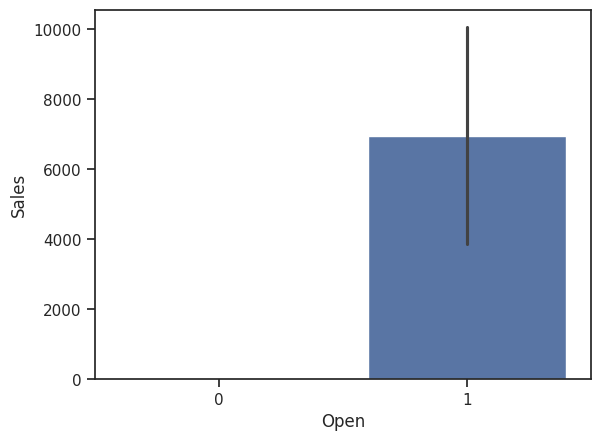

In [49]:
import numpy as np
import seaborn as sns

# ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º ÌÜµÌïú Ïã†Î¢∞ Íµ¨Í∞Ñ ÌôïÏù∏, Ïù¥ÌÉàÎ•†Ïóê Îî∞Î•∏ ÏõîÎ≥Ñ ÏöîÍ∏à
sns.barplot(data=train_store, x="Open", y="Sales", ci="sd")  # errorbar ÎåÄÏã† ciÎ•º ÏÇ¨Ïö©ÌïòÍ≥† sd(ÌëúÏ§ÄÌé∏Ï∞®)Î•º Í∏∞Î∞òÏúºÎ°ú Ïã†Î¢∞Íµ¨Í∞Ñ ÌëúÏãú

# Sales Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
sales_data = train_store['Sales']

# Ï†êÏ∂îÏ†ï: SalesÏùò ÌëúÎ≥∏ ÌèâÍ∑† Í≥ÑÏÇ∞
point_estimate = sales_data.mean()
print(f"SalesÏùò ÌëúÎ≥∏ ÌèâÍ∑† (Ï†êÏ∂îÏ†ï): {point_estimate}")

# Íµ¨Í∞Ñ Ï∂îÏ†ï: 95% Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞
# ÌëúÎ≥∏ ÌÅ¨Í∏∞, ÌëúÎ≥∏ ÌèâÍ∑†, ÌëúÎ≥∏ ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
sample_size = len(sales_data)
sample_mean = sales_data.mean()
sample_std = np.std(sales_data, ddof=1)

# Ïã†Î¢∞ÏàòÏ§ÄÏóê Îî∞Î•∏ ZÍ∞í Í≥ÑÏÇ∞ (Ïó¨Í∏∞ÏÑúÎäî 95%Î•º Í∏∞Ï§ÄÏúºÎ°ú Ìï®)
confidence_level = 0.95
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# Ï∂îÏ†ï Ïò§Ï∞® Í≥ÑÏÇ∞
margin_of_error = z_value * (sample_std / np.sqrt(sample_size))

# Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"95% Ïã†Î¢∞Íµ¨Í∞Ñ: {confidence_interval}")

In [50]:
sales_data = train_store['Sales']

# Ï†êÏ∂îÏ†ï: `Sales`Ïùò ÌëúÎ≥∏ ÌèâÍ∑† Í≥ÑÏÇ∞
point_estimate_sales = sales_data.mean()
print("Ï†êÏ∂îÏ†ï (Sales ÌèâÍ∑†):", point_estimate_sales)

Ï†êÏ∂îÏ†ï (Sales ÌèâÍ∑†): 5773.818972305593


In [51]:
# ÌëúÎ≥∏ ÌÅ¨Í∏∞, ÌëúÎ≥∏ ÌèâÍ∑†, ÌëúÎ≥∏ ÌëúÏ§ÄÌé∏Ï∞® Í≥ÑÏÇ∞
sample_size_sales = len(sales_data)
sample_mean_sales = sales_data.mean()
sample_std_sales = np.std(sales_data, ddof=1)

# 95% Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞ (Z-score ÏÇ¨Ïö©)
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (sample_std_sales / np.sqrt(sample_size_sales))

confidence_interval = (sample_mean_sales - margin_of_error, sample_mean_sales + margin_of_error)
print("95% Ïã†Î¢∞Íµ¨Í∞Ñ:", confidence_interval)


95% Ïã†Î¢∞Íµ¨Í∞Ñ: (5766.337356619179, 5781.3005879920065)


- Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞

In [58]:
from scipy import stats
# Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞ (t-Î∂ÑÌè¨ ÏÇ¨Ïö©)
# stats.t.ppf Î°ú t_critical Íµ¨ÌïòÍ∏∞
confidence_level = 0.95
alpha = 1 - confidence_level

t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)  # t-Î∂ÑÌè¨Ïùò ÏûÑÍ≥ÑÍ∞í
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

point_estimate, confidence_interval

(5773.818972305593, (4810.2997657388905, 6737.338178872295))

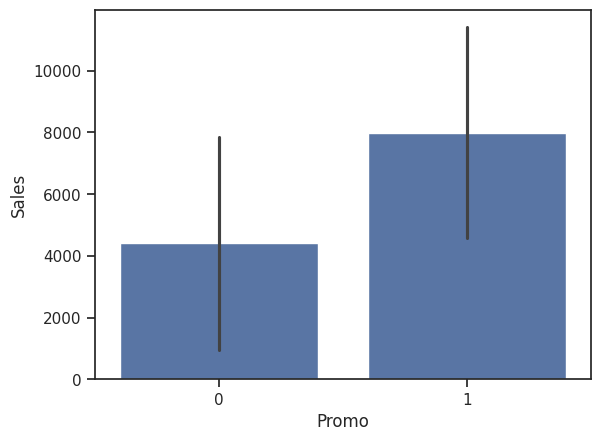

Promo ÌôúÏÑ±Ìôî Ïãú SalesÏùò ÌèâÍ∑†: 7991.152045969903
Promo ÎπÑÌôúÏÑ±Ìôî Ïãú SalesÏùò ÌèâÍ∑†: 4406.050805160786
Promo ÌôúÏÑ±Ìôî Ïãú 95% Ïã†Î¢∞Íµ¨Í∞Ñ: (7980.395079881327, 8001.90901205848)
Promo ÎπÑÌôúÏÑ±Ìôî Ïãú 95% Ïã†Î¢∞Íµ¨Í∞Ñ: (4397.544403566801, 4414.557206754771)


In [59]:
# ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ•º ÌÜµÌïú Ïã†Î¢∞ Íµ¨Í∞Ñ ÌôïÏù∏, PromoÏóê Îî∞Î•∏ Sales
sns.barplot(data=train_store, x="Promo", y="Sales", ci="sd")  # sd(ÌëúÏ§ÄÌé∏Ï∞®)Î•º Í∏∞Î∞òÏúºÎ°ú Ïã†Î¢∞Íµ¨Í∞Ñ ÌëúÏãú
plt.show()

# Promo ÌôúÏÑ±ÌôîÏôÄ ÎπÑÌôúÏÑ±ÌôîÏóê Îî∞Î•∏ Sales Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
sales_data_promo = train_store[train_store['Promo'] == 1]['Sales']
sales_data_no_promo = train_store[train_store['Promo'] == 0]['Sales']

# Promo ÌôúÏÑ±ÌôîÎêú ÎÇ†Ïùò Sales ÌèâÍ∑† Í≥ÑÏÇ∞ (Ï†êÏ∂îÏ†ï)
point_estimate_promo = sales_data_promo.mean()

# Promo ÎπÑÌôúÏÑ±ÌôîÎêú ÎÇ†Ïùò Sales ÌèâÍ∑† Í≥ÑÏÇ∞ (Ï†êÏ∂îÏ†ï)
point_estimate_no_promo = sales_data_no_promo.mean()

print(f"Promo ÌôúÏÑ±Ìôî Ïãú SalesÏùò ÌèâÍ∑†: {point_estimate_promo}")
print(f"Promo ÎπÑÌôúÏÑ±Ìôî Ïãú SalesÏùò ÌèâÍ∑†: {point_estimate_no_promo}")

# Í∞Å Ï°∞Í±¥Ïóê ÎåÄÌïú 95% Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞
def calculate_confidence_interval(data):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    sample_size = len(data)
    z_value = stats.norm.ppf(0.975)  # 95% Ïã†Î¢∞Íµ¨Í∞Ñ
    margin_of_error = z_value * (sample_std / np.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return confidence_interval

confidence_interval_promo = calculate_confidence_interval(sales_data_promo)
confidence_interval_no_promo = calculate_confidence_interval(sales_data_no_promo)

print(f"Promo ÌôúÏÑ±Ìôî Ïãú 95% Ïã†Î¢∞Íµ¨Í∞Ñ: {confidence_interval_promo}")
print(f"Promo ÎπÑÌôúÏÑ±Ìôî Ïãú 95% Ïã†Î¢∞Íµ¨Í∞Ñ: {confidence_interval_no_promo}")

### 2.2 ÌëúÎ≥∏ ÌÅ¨Í∏∞ Í≤∞Ï†ï

In [57]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

# ÏòàÏãú ÌååÎùºÎØ∏ÌÑ∞
effect_size = 0.5  # ÏûëÏùÄ Ìö®Í≥º ÌÅ¨Í∏∞
alpha = 0.05  # Ïú†Ïùò ÏàòÏ§Ä
power = 0.8  # 1 - Î≤†ÌÉÄ, Í≤ÄÏ†ïÎ†•

# ÌëúÎ≥∏ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha)
print(f"ÌïÑÏöîÌïú ÌëúÎ≥∏ ÌÅ¨Í∏∞: {np.ceil(sample_size)}")

ÌïÑÏöîÌïú ÌëúÎ≥∏ ÌÅ¨Í∏∞: 64.0


In [60]:
# Î™®ÏßëÎã®Ïùò ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞® Ï∂îÏ†ï
mean_sales = train_store['Sales'].mean()
std_sales = train_store['Sales'].std()

print(f"Ï∂îÏ†ïÎêú Î™®ÏßëÎã® ÌèâÍ∑† ÌåêÎß§Îüâ: {mean_sales}")
print(f"Ï∂îÏ†ïÎêú Î™®ÏßëÎã® ÌåêÎß§ÎüâÏùò ÌëúÏ§ÄÌé∏Ï∞®: {std_sales}")

Ï∂îÏ†ïÎêú Î™®ÏßëÎã® ÌèâÍ∑† ÌåêÎß§Îüâ: 5773.818972305593
Ï∂îÏ†ïÎêú Î™®ÏßëÎã® ÌåêÎß§ÎüâÏùò ÌëúÏ§ÄÌé∏Ï∞®: 3849.926175234759


In [64]:
# ÏòàÏÉÅ margin_of_errorÏôÄ confidence_level ÏÑ§Ï†ï (5% Ïò§Ï∞®, 95% Ïã†Î¢∞ÏàòÏ§Ä)
margin_of_error = 0.10
confidence_level = 0.90
z_value = stats.norm.ppf((1 + confidence_level) / 2)

# ÌïÑÏöîÌïú ÌëúÎ≥∏ ÌÅ¨Í∏∞ Í≥ÑÏÇ∞
required_sample_size = (z_value * std_sales / margin_of_error) ** 2
print(f"ÌïÑÏöîÌïú ÌëúÎ≥∏ ÌÅ¨Í∏∞: {int(required_sample_size)}")

ÌïÑÏöîÌïú ÌëúÎ≥∏ ÌÅ¨Í∏∞: 4010137989


### 2.3 Ï∂îÏ†ï Ïò§Ï∞® Î∂ÑÏÑù

- Ïã†Î¢∞ Íµ¨Í∞Ñ(Confidence Interval): Ï£ºÏñ¥ÏßÑ Ïã†Î¢∞ ÏàòÏ§Ä(Ïòà: 95%)ÏóêÏÑú Î™®ÏàòÍ∞Ä Ìè¨Ìï®Îê† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÎäî Í∞íÏùò Î≤îÏúÑÏûÖÎãàÎã§. Ïã†Î¢∞ Íµ¨Í∞ÑÏù¥ Ï¢ÅÏùÑÏàòÎ°ù Ï∂îÏ†ïÏπòÏùò Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÏäµÎãàÎã§.
- ÌëúÏ§Ä Ïò§Ï∞®(Standard Error): ÌëúÎ≥∏ ÌèâÍ∑†Ïùò ÌëúÏ§Ä Ìé∏Ï∞®Î°ú, ÌëúÎ≥∏ ÌÅ¨Í∏∞Í∞Ä Ïª§ÏßàÏàòÎ°ù Í∞êÏÜåÌï©ÎãàÎã§.

In [62]:
# Ïã†Î¢∞ Íµ¨Í∞Ñ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ïã†Î¢∞ÏàòÏ§Ä ÏÑ§Ï†ï
confidence_interval = stats.norm.interval(confidence_level, loc=mean_sales, scale=std_sales/np.sqrt(len(train_store)))

print(f"{confidence_level*100}% Ïã†Î¢∞ Íµ¨Í∞Ñ: {confidence_interval}")


95.0% Ïã†Î¢∞ Íµ¨Í∞Ñ: (5766.337356619179, 5781.3005879920065)


- Ìï¥ÏÑù
  - ÌèâÍ∑† ÌåêÎß§Îüâ: Î™®ÏßëÎã®Ïùò ÌèâÍ∑† ÌåêÎß§ÎüâÏù¥ ÏïΩ 5773.82Î°ú Ï∂îÏ†ïÎêúÎã§. Ïù¥Îäî Îß§Ïû•Ïùò ÌïòÎ£® ÌèâÍ∑† ÌåêÎß§ÎüâÏù¥ ÎåÄÎûµ Ïù¥ ÏàòÏπòÎ•º Ï§ëÏã¨ÏúºÎ°ú Î∂ÑÌè¨Ìï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÌï† Ïàò ÏûàÎã§.
  - ÌëúÏ§ÄÌé∏Ï∞®: ÌåêÎß§Îüâ Îç∞Ïù¥ÌÑ∞Ïùò ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä ÏïΩ 3849.93ÏúºÎ°ú, ÌåêÎß§ÎüâÏùò Î∂ÑÌè¨Í∞Ä ÌèâÍ∑†Í∞íÏùÑ Ï§ëÏã¨ÏúºÎ°ú ÏÉÅÎãπÌûà ÎÑìÍ≤å ÌçºÏ†∏ ÏûàÏùåÏùÑ ÏùòÎØ∏ÌûåÎã§. Ï¶â, Îß§Ïû•Î≥Ñ ÌåêÎß§ÎüâÏùò Î≥ÄÎèôÏù¥ ÌÅ¨Îã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî Í∞Å Îß§Ïû•Ïùò ÏúÑÏπò, ÌîÑÎ°úÎ™®ÏÖò ÌôúÎèô, ÏßÄÏó≠ ÌñâÏÇ¨, Í≥ÑÏ†àÏÑ± Îì± Îã§ÏñëÌïú ÏöîÏù∏Ïóê ÏùòÌï¥ ÌåêÎß§ÎüâÏù¥ ÌÅ¨Í≤å ÏòÅÌñ•ÏùÑ Î∞õÏùÑ Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.
- Ï∂îÍ∞ÄÏ†ÅÏù∏ Î∂ÑÏÑù Î∞©Î≤ï
  - Îç∞Ïù¥ÌÑ∞ ÏÑ∏Î∂ÑÌôî: ÌåêÎß§ÎüâÏùò Î≥ÄÎèôÏÑ±Ïù¥ ÌÅ¨Í∏∞Ïóê, Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º ÏÑ∏Î∂ÑÌôîÌïòÏó¨ Î∂ÑÏÑù. ÏòàÎ•º Îì§Ïñ¥, ÏßÄÏó≠Î≥Ñ, ÌîÑÎ°úÎ™®ÏÖò Ïú†Î¨¥Î≥Ñ, Í≥ÑÏ†àÎ≥ÑÎ°ú ÎÇòÎàÑÏñ¥ Î∂ÑÏÑùÌï®ÏúºÎ°úÏç® Îçî Ï†ïÌôïÌïú ÌäπÏÑ±ÏùÑ ÌååÏïÖÌï† Ïàò ÏûàÎã§. Ïù¥Î•º ÌÜµÌï¥ ÌäπÏ†ï Ï°∞Í±¥ÏóêÏÑúÏùò ÌåêÎß§ ÏòàÏ∏° Ï†ïÌôïÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§

  - Ïã†Î¢∞Íµ¨Í∞Ñ ÌôúÏö©: Ï£ºÏñ¥ÏßÑ ÌëúÏ§ÄÌé∏Ï∞®Î•º Î∞îÌÉïÏúºÎ°ú, ÌåêÎß§Îüâ ÏòàÏ∏°Ïóê ÎåÄÌïú Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Ï†úÏãúÌïòÍ∏∞. Ïù¥Î•º ÌÜµÌï¥ ÌåêÎß§Îüâ ÏòàÏ∏°Ïùò Î∂àÌôïÏã§ÏÑ±ÏùÑ Ï†ïÎüâÌôîÌïòÍ≥†, Í¥ÄÎ¶¨ÏûêÎì§Ïù¥ Î≥¥Îã§ Ï†ïÎ≥¥Ïóê Í∏∞Î∞òÌïú ÏùòÏÇ¨Í≤∞Ï†ïÏùÑ Ìï† Ïàò ÏûàÎèÑÎ°ù ÎèÑÏö∏ Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§.

  - Î∂ÄÌä∏Ïä§Ìä∏Îû© Î∞©Î≤ï: Ï†úÌïúÎêú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Ï∂îÍ∞ÄÏ†ÅÏù∏ Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌï¥, Î∂ÄÌä∏Ïä§Ìä∏Îû© Î∞©Î≤ïÏùÑ ÌôúÏö©Ìï† Ïàò ÏûàÎã§. Ïù¥Îäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Î≥µÏõê Ï∂îÏ∂úÏùÑ ÌÜµÌï¥ Ïó¨Îü¨ Î≤à ÌëúÎ≥∏ÏùÑ ÏÉùÏÑ±ÌïòÍ≥†, Ïù¥Îì§ ÌëúÎ≥∏Ïóê ÎåÄÌïú ÌÜµÍ≥ÑÎüâÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Î™®ÏßëÎã®Ïùò ÌÜµÍ≥ÑÎüâÏùÑ Îçî Ï†ïÌôïÌïòÍ≤å Ï∂îÏ†ïÌïòÎäî Îç∞ ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÎã§.

  - Î™®Îç∏ Í∏∞Î∞ò Ï†ëÍ∑º: Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ ÌåêÎß§ÎüâÏùÑ ÏòàÏ∏°ÌïòÎäî Í≤ÉÎèÑ Í≥†Î†§Ìï† Ïàò ÏûàÎã§. Ïù¥ Í≤ΩÏö∞, ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù, ÌöåÍ∑Ä Î∂ÑÏÑù, ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Îì± Îã§ÏñëÌïú Î™®Îç∏ÏùÑ Ïã§ÌóòÌïòÏó¨ Í∞ÄÏû• Ï†ïÌôïÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º Ï†úÍ≥µÌïòÎäî Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï† Ïàò ÏûàÏäµÎãàÎã§. Î™®Îç∏ Í∏∞Î∞ò Ï†ëÍ∑º Î∞©Î≤ïÏùÄ ÌåêÎß§ÎüâÏùò Î≥ÄÎèôÏÑ±ÏùÑ Ìè¨Ï∞©ÌïòÍ≥†, Îã§ÏñëÌïú ÏöîÏù∏Ïù¥ ÌåêÎß§ÎüâÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ïù¥Ìï¥ÌïòÎäî Îç∞ ÎèÑÏõÄ Ï§Ñ Ïàò ÏûàÍ≤†ÏßÄ....üò≠

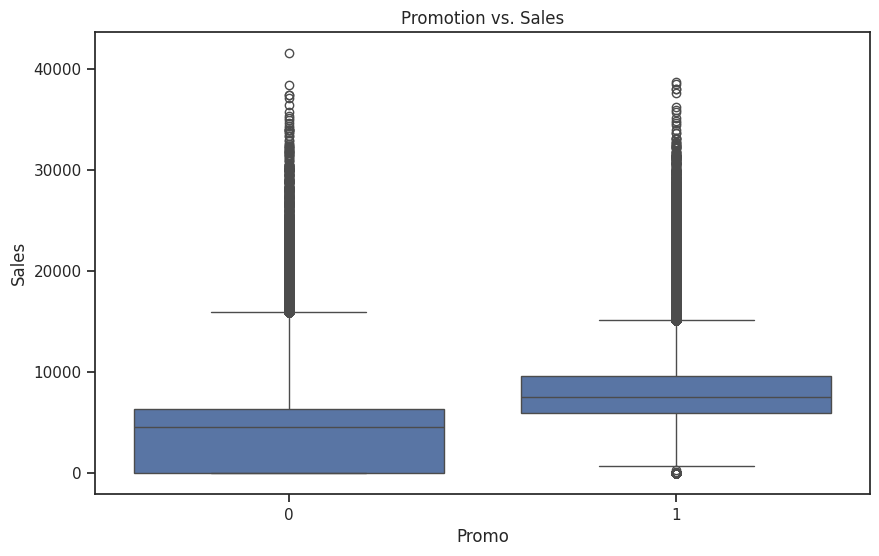

In [66]:
# ÌîÑÎ°úÎ™®ÏÖò Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌåêÎß§Îüâ ÎπÑÍµê
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_store)
plt.title('Promotion vs. Sales')
plt.show()

# 3. Í≤ÄÏ†ï (5)

 [‚úîÔ∏è] Í∞ÄÏÑ§ ÏÑ§Ï†ï: Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º ÎåÄÎ¶ΩÍ∞ÄÏÑ§ \
 [‚úîÔ∏è] Ï†ÅÏ†àÌïú Í≤ÄÏ†ï Î∞©Î≤ï ÏÑ†ÌÉù: t-Í≤ÄÏ†ï, Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï, ANOVA Îì± \
 [‚úîÔ∏è] Í≤ÄÏ†ï ÏàòÌñâ Î∞è Í≤∞Í≥º Ìï¥ÏÑù \
 [‚úîÔ∏è] Í≤ÄÏ†ïÏùò Ïú†ÏùòÏÑ± ÌèâÍ∞Ä: p-Í∞í, Ïã†Î¢∞Íµ¨Í∞Ñ \
[‚úîÔ∏è] Í≤ÄÏ†ï Í≤∞Í≥ºÏóê ÎåÄÌïú Ìï¥ÏÑù Î∞è Í≤∞Î°† ÎèÑÏ∂ú \

### 3.1  Í∞ÄÏÑ§ ÏÑ§Ï†ï: Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º ÎåÄÎ¶ΩÍ∞ÄÏÑ§



*** PromoÏôÄ Sales ÏÇ¨Ïù¥Ïóê Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ ***

- Í∑ÄÎ¨¥Í∞ÄÏÑ§ (H0): PromoÍ∞Ä SalesÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäîÎã§. (PromoÏôÄ Sales ÏÇ¨Ïù¥ÏóêÎäî Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÎã§.)
- ÎåÄÎ¶ΩÍ∞ÄÏÑ§ (H1): PromoÍ∞Ä SalesÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§. (PromoÏôÄ Sales ÏÇ¨Ïù¥ÏóêÎäî ÏñëÏùò Í¥ÄÍ≥ÑÍ∞Ä ÏûàÎã§.)

* t-ÌÜµÍ≥ÑÎüâ: Îëê Í∑∏Î£π Í∞ÑÏùò ÌèâÍ∑† Ïù¥Ïö© Í∏∞Í∞ÑÏóê Îß§Ïö∞ ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. t-ÌÜµÍ≥ÑÎüâÏù¥ ÏùåÏàòÏù¥ÎØÄÎ°ú Ïù¥ÌÉàÌïú Í≥†Í∞ù Í∑∏Î£πÏùò ÌèâÍ∑† Ïù¥Ïö© Í∏∞Í∞ÑÏù¥ Îçî ÏßßÏäµÎãàÎã§.
* p-Í∞í: Îß§Ïö∞ ÎÇÆÏùÄ p-Í∞íÏùÄ Í∑ÄÎ¨¥Í∞ÄÏÑ§(ÌÜµÏã†ÏÇ¨ Ïù¥Ïö© Í∏∞Í∞ÑÏù¥ Í≥†Í∞ù Ïù¥ÌÉà Ïó¨Î∂ÄÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎäîÎã§)ÏùÑ Í∏∞Í∞ÅÌïòÎäî Îç∞ Ï∂©Î∂ÑÌï©ÎãàÎã§. Ï¶â, ÌÜµÏã†ÏÇ¨ Ïù¥Ïö© Í∏∞Í∞ÑÍ≥º Í≥†Í∞ùÏùò Ïù¥ÌÉà Ïó¨Î∂ÄÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Í¥ÄÎ†®Ïù¥ ÏûàÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
* ÏûêÏú†ÎèÑ: ÏûêÏú†ÎèÑÎäî Îëê ÌëúÎ≥∏Ïùò Î∂ÑÏÇ∞Ïù¥ Îã§Î•¥Îã§Í≥† Í∞ÄÏ†ïÌñàÏùÑ Îïå Í≥ÑÏÇ∞Îê©ÎãàÎã§. Ïù¥ Í≤ΩÏö∞ ÎÜíÏùÄ ÏûêÏú†ÎèÑÎäî t-Î∂ÑÌè¨Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

### 3.2 Ï†ÅÏ†àÌïú Í≤ÄÏ†ï Î∞©Î≤ï ÏÑ†ÌÉù
- t-Í≤ÄÏ†ï, Ïπ¥Ïù¥Ï†úÍ≥± Í≤ÄÏ†ï, ANOVA Îì±



In [75]:
# Promo Ïó¨Î∂ÄÏóê Îî∞Î•∏ Sales Î∂ÑÏÑùÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
promo_yes = train_store[train_store['Promo'] == 1]['Sales']
promo_no = train_store[train_store['Promo'] == 0]['Sales']

- t-Í≤ÄÏ†ï ÏàòÌñâ
  - stats.ttest_ind Ìï®ÏàòÎäî Îëê ÎèÖÎ¶Ω ÌëúÎ≥∏ Í∑∏Î£π Í∞ÑÏùò ÌèâÍ∑† Ï∞®Ïù¥Î•º Í≤ÄÏ†ïÌïòÎäî Îç∞ ÏÇ¨Ïö©Îê©ÎãàÎã§.
  - equal_var=FalseÎäî Îëê Í∑∏Î£πÏùò Î∂ÑÏÇ∞Ïù¥ ÎèôÏùºÌïòÏßÄ ÏïäÎã§Îäî Í∞ÄÏ†ï ÌïòÏóê Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌïòÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.
  - Ïù¥Îäî Î≥¥ÌÜµ Îëê ÌëúÎ≥∏ ÌÅ¨Í∏∞Í∞Ä Îã§Î•¥Í±∞ÎÇò Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Í∞Ä ÏÑúÎ°ú Îã§Î•º Îïå ÏÇ¨Ïö©Îê©ÎãàÎã§.
- t_statisticÏùÄ t-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâÏúºÎ°ú, Îëê Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Ï∞®Ïù¥Ïùò ÌÅ¨Í∏∞ÏôÄ Î∞©Ìñ•ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
- p_valueÎäî Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Ï∞∏Ïùº Îïå Í¥ÄÏ∏°Îêú Í≤∞Í≥ºÍ∞Ä Î∞úÏÉùÌï† ÌôïÎ•†ÏûÖÎãàÎã§.
  - Ïù¥ Í∞íÏù¥ Îß§Ïö∞ ÏûëÏúºÎ©¥(Î≥¥ÌÜµ 0.05 Ïù¥Ìïò), Îëê Í∑∏Î£π Í∞Ñ ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.

- Ï†ÅÏ†àÌïú Í≤ÄÏ†ï Î∞©Î≤ï ÏÑ†ÌÉù:

  - PromoÏôÄ SalesÏùò Í¥ÄÍ≥ÑÎ•º ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ t-Í≤ÄÏ†ï ÏÇ¨Ïö©
  - PromoÍ∞Ä Îëê Í∞ÄÏßÄ Í∞íÏùÑ Í∞ÄÏßÄÎØÄÎ°ú (ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÏûàÎäî ÎÇ†Í≥º ÏóÜÎäî ÎÇ†), ÎèÖÎ¶ΩÎêú Îëê ÌëúÎ≥∏ t-Í≤ÄÏ†ïÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå

In [53]:
train_store['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [79]:
# PhoneServiceÎ•º Ïù¥Ïö©ÌïòÎäî Í≥†Í∞ùÍ≥º Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≥†Í∞ùÏùò Ïù¥ÌÉàÎ•† Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
promo_yes = train_store[train_store['Promo'] == 1]['Sales']
promo_no = train_store[train_store['Promo'] == 0]['Sales']

# Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï
_, p_value_homogeneity = stats.levene(promo_yes, promo_no)

# Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï Í≤∞Í≥ºÏóê Îî∞Îùº Ï†ÅÏ†àÌïú t-Í≤ÄÏ†ï ÏàòÌñâ

# Îì±Î∂ÑÏÇ∞ÏÑ±Ïù¥ Í∞ÄÏ†ïÎêòÎäî Í≤ΩÏö∞
equal_val = True
if p_value_homogeneity < 0.05 :
    # Îì±Î∂ÑÏÇ∞ÏÑ±Ïù¥ Í∞ÄÏ†ïÎêòÏßÄ ÏïäÎäî Í≤ΩÏö∞
    equal_val = False

t_statistic, p_value =  stats.ttest_ind(promo_yes, promo_no, equal_var=equal_val)
p_value_homogeneity, t_statistic

(0.0, 512.3755316936371)

* Ïú†ÏùòÏÑ± ÌåêÎã®: p-valueÍ∞Ä Ïú†Ïùò ÏàòÏ§Ä ÏÑ† ÏïÑÎûòÏóê ÏúÑÏπòÌïòÎ©¥, Ìï¥Îãπ Í≤ÄÏ†ï Í≤∞Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
* ÏòàÎ•º Îì§Ïñ¥, t-Í≤ÄÏ†ïÏùò p-valueÍ∞Ä 0.05 ÏïÑÎûòÏù¥Î©¥, Îëê Í∑∏Î£π Í∞ÑÏùò ÌèâÍ∑† Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÎØ∏ÌïòÎã§Í≥† Ìï¥ÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.

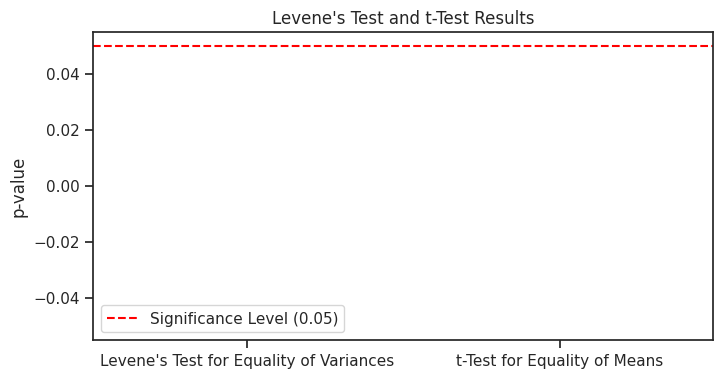

In [78]:
# Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏ†ï Í≤∞Í≥ºÏôÄ t-Í≤ÄÏ†ï Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
labels = ['Levene\'s Test for Equality of Variances', 't-Test for Equality of Means']
values = [p_value_homogeneity, p_value]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 4))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('p-value')
plt.title('Levene\'s Test and t-Test Results')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

### 3.3  Í≤ÄÏ†ï ÏàòÌñâ Î∞è Í≤∞Í≥º Ìï¥ÏÑù

In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Ïó¨Îü¨ ÏßëÎã®Ïùò ÌèâÍ∑† ÎπÑÍµêÎ•º ÏúÑÌïú Î∂ÑÏÑù ÏòàÏãú: Í≥†Í∞ùÏùò Ïù∏ÌÑ∞ÎÑ∑ ÏÑúÎπÑÏä§ ÌÉÄÏûÖÎ≥Ñ ÏõîÎ≥Ñ ÏöîÍ∏à
# MonthlyCharges ~ C(InternetService) => 'InternetService' Ïó¥Í≥º 'MonthlyCharges' Ïó¥ÏùÑ ÏÇ¨Ïö©

# Î∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA) ÏàòÌñâ
model = ols("Sales ~ C(Promo)", data=train_store).fit()
# anova_lm
sm.stats.anova_lm(model, typ=2).round(2)

sum_sq         df          F  PR(>F)
C(Promo)  3.084989e+12        1.0  261680.52     0.0
Residual  1.199200e+13  1017207.0        NaN     NaN

* ANOVA Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî
* Í∞Å Ïù∏ÌÑ∞ÎÑ∑ ÏÑúÎπÑÏä§ ÌÉÄÏûÖ(DSL, Fiber optic, No)Î≥Ñ ÏõîÎ≥Ñ ÏöîÍ∏àÏùò Î∂ÑÌè¨Î•º ÎπÑÍµêÌï† Ïàò ÏûàÏäµÎãàÎã§.
* Î∞ïÏä§ÌîåÎ°ØÏóêÏÑúÎäî Ï§ëÏïôÍ∞í, ÏÇ¨Î∂ÑÏúÑÏàò, Ïù¥ÏÉÅÏπò Îì±Ïùò Ï†ïÎ≥¥Î•º ÌïúÎààÏóê ÌååÏïÖÌï† Ïàò ÏûàÏúºÎ©∞, Ïù¥Î•º ÌÜµÌï¥ ÏßëÎã® Í∞ÑÏùò ÌèâÍ∑† Ï∞®Ïù¥ÎøêÎßå ÏïÑÎãàÎùº Ï†ÑÎ∞òÏ†ÅÏù∏ Î∂ÑÌè¨Ïùò Ï∞®Ïù¥ÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

<Axes: xlabel='Sales', ylabel='Count'>

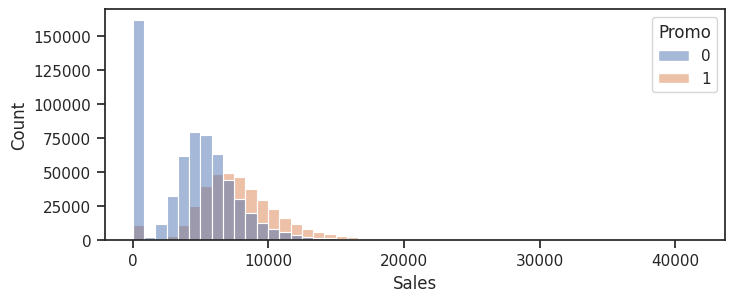

In [81]:
# histplot
plt.figure(figsize=(8, 3))
sns.histplot(data=train_store, x="Sales", hue="Promo", bins=50)

<Axes: xlabel='Sales'>

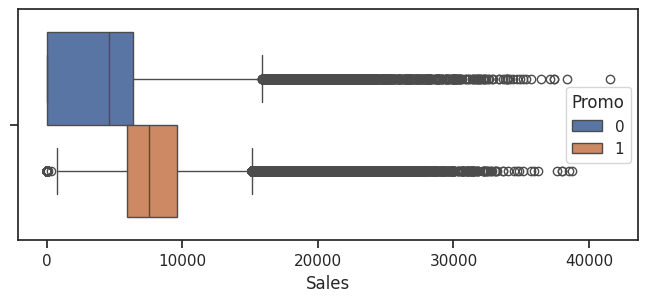

In [83]:
# ANOVA Í≤∞Í≥º ÏãúÍ∞ÅÌôî boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(data=train_store, x="Sales", hue="Promo")

<Axes: xlabel='Sales'>

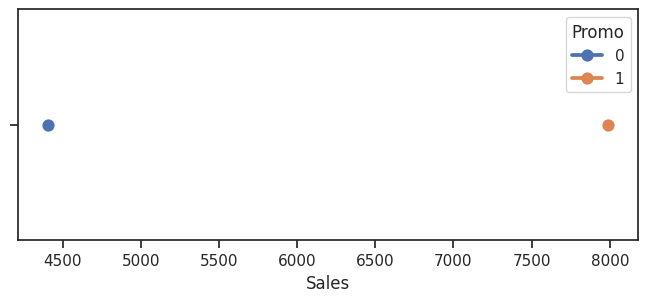

In [82]:
# pointplot
plt.figure(figsize=(8, 3))
sns.pointplot(data=train_store, x="Sales", hue="Promo", errorbar="ci")

In [77]:
from scipy.stats import ttest_ind

promo_sales = train_store[train_store['Promo'] == 1]['Sales']
no_promo_sales = train_store[train_store['Promo'] == 0]['Sales']

t_stat, p_value = ttest_ind(promo_sales, no_promo_sales, equal_var=False)
print(f"t-ÌÜµÍ≥ÑÎüâ: {t_stat}, p-Í∞í: {p_value}")

t-ÌÜµÍ≥ÑÎüâ: 512.3755316936371, p-Í∞í: 0.0


### 3.4 Í≤ÄÏ†ïÏùò Ïú†ÏùòÏÑ± ÌèâÍ∞Ä: p-Í∞í, Ïã†Î¢∞Íµ¨Í∞Ñ
1. pÍ∞íÏùÑ ÌÜµÌïú Í≤ÄÏ†ï Ïú†ÏùòÏÑ± ÌèâÍ∞Ä:
- pÍ∞íÏùÄ Í∑ÄÎ¨¥ Í∞ÄÏÑ§(H0) ÌïòÏóêÏÑú Í¥ÄÏ∏°Îêú Îç∞Ïù¥ÌÑ∞, ÌòπÏùÄ Îçî Í∑πÎã®Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Î∞úÏÉùÌï† ÌôïÎ•†ÏûÖÎãàÎã§. pÍ∞íÏù¥ Îß§Ïö∞ ÎÇÆÎã§Îäî Í≤ÉÏùÄ Í∑ÄÎ¨¥ Í∞ÄÏÑ§ ÌïòÏóêÏÑú Ïö∞Î¶¨Í∞Ä Í¥ÄÏ∏°Ìïú Í≤∞Í≥ºÍ∞Ä Î∞úÏÉùÌï† Í∞ÄÎä•ÏÑ±Ïù¥ Îß§Ïö∞ ÎÇÆÏùåÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§.
- **Ïú†Ïùò ÏàòÏ§Ä(Œ±)**ÏùÄ Î≥¥ÌÜµ 0.05Î°ú ÏÑ§Ï†ïÎêòÎ©∞, Ïù¥Îäî Ïó∞Íµ¨ÏûêÍ∞Ä Ïö©Ïù∏Ìï† Ïàò ÏûàÎäî ÏµúÎåÄ Ïò§Î•ò ÌôïÎ•†ÏûÖÎãàÎã§. pÍ∞íÏù¥ Œ±Î≥¥Îã§ ÏûëÏùÑ Í≤ΩÏö∞, Í∑ÄÎ¨¥ Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† ÎåÄÏïà Í∞ÄÏÑ§(H1)ÏùÑ Ï±ÑÌÉùÌï©ÎãàÎã§.
2. Ïã†Î¢∞Íµ¨Í∞ÑÏùÑ ÌÜµÌïú Í≤ÄÏ†ï Ïú†ÏùòÏÑ± ÌèâÍ∞Ä:
- Ïã†Î¢∞Íµ¨Í∞ÑÏùÄ Î™®ÏßëÎã® ÌååÎùºÎØ∏ÌÑ∞(Ïòà: ÌèâÍ∑†, ÎπÑÏú® Îì±)Ïóê ÎåÄÌïú Ï∂îÏ†ï Î≤îÏúÑÎ°ú, ÌäπÏ†ï Ïã†Î¢∞ ÏàòÏ§Ä(Ïòà: 95%) ÌïòÏóêÏÑú Í∑∏ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Ï°¥Ïû¨Ìï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎêòÎäî Íµ¨Í∞ÑÏûÖÎãàÎã§.
- Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ ÌäπÏ†ï Í∞í(Ïòà: 0Ïùò Ï∞®Ïù¥, ÎòêÎäî ÌäπÏ†ï Í∏∞Ï§ÄÍ∞í)ÏùÑ Ìè¨Ìï®ÌïòÏßÄ ÏïäÏùÑ Í≤ΩÏö∞, Ïù¥Îäî Í∑∏ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å Í∑∏ Í∞íÍ≥º Îã§Î•¥Îã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [85]:
# PromoÍ∞Ä 1Ïù∏ Í≤ΩÏö∞ÏôÄ 0Ïù∏ Í≤ΩÏö∞Ïùò Sales Îç∞Ïù¥ÌÑ∞
promo_sales = train_store[train_store['Promo'] == 1]['Sales']
no_promo_sales = train_store[train_store['Promo'] == 0]['Sales']

# ÌèâÍ∑† Ï∞®Ïù¥ Í≥ÑÏÇ∞
mean_difference = np.mean(promo_sales) - np.mean(no_promo_sales)

# ÌëúÏ§Ä Ïò§Ï∞® Í≥ÑÏÇ∞
se_promo = stats.sem(promo_sales, ddof=1)
se_no_promo = stats.sem(no_promo_sales, ddof=1)
se_difference = np.sqrt(se_promo**2 + se_no_promo**2)

# Ïã†Î¢∞Íµ¨Í∞Ñ Í≥ÑÏÇ∞ (95% Ïã†Î¢∞ÏàòÏ§Ä)
confidence_level = 0.95
df = min(len(promo_sales), len(no_promo_sales)) - 1  # ÏûêÏú†ÎèÑ
t_critical = stats.t.ppf((1 + confidence_level) / 2, df)
margin_of_error = t_critical * se_difference

# Ïã†Î¢∞Íµ¨Í∞Ñ Ï∂úÎ†•
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error
print(f"95% Ïã†Î¢∞Íµ¨Í∞Ñ: ({lower_bound}, {upper_bound})")

95% Ïã†Î¢∞Íµ¨Í∞Ñ: (3571.3872931407623, 3598.8151884774725)


**Rossmann Dataset**

1. pÍ∞í Ìï¥ÏÑù
- Promo Î≥ÄÏàòÏóê Îî∞Î•∏ SalesÏùò t-ÌÜµÍ≥ÑÎüâÏù¥ 512.3755, p-Í∞íÏù¥ 0.0ÏúºÎ°ú ÎÇòÌÉÄÎÇ¨ÏäµÎãàÎã§. Ïù¥Îäî ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÏûàÏùÑ ÎïåÏôÄ ÏóÜÏùÑ ÎïåÏùò SalesÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å Îã§Î•¥Îã§Îäî Í∞ïÎ†•Ìïú Ï¶ùÍ±∞ÏûÖÎãàÎã§. Ïú†Ïùò ÏàòÏ§Ä 0.05Î≥¥Îã§ Ìõ®Ïî¨ ÏûëÏúºÎØÄÎ°ú, Í∑ÄÎ¨¥ Í∞ÄÏÑ§(H0: ÌîÑÎ°úÎ™®ÏÖò Ï†ÑÌõÑÏùò SalesÏóê Ï∞®Ïù¥Í∞Ä ÏóÜÎã§)ÏùÑ Í∏∞Í∞ÅÌï©ÎãàÎã§.

2. Ïã†Î¢∞Íµ¨Í∞Ñ Ìï¥ÏÑù
- Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ 0ÏùÑ Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† Ï†ÑÏ†ÅÏúºÎ°ú ÏñëÏàòÏù∏ Í≤ΩÏö∞, Ïù¥Îäî ÌîÑÎ°úÎ™®ÏÖòÏù¥ SalesÎ•º ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å Ï¶ùÍ∞ÄÏãúÌÇ®Îã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

[95% Ïã†Î¢∞Íµ¨Í∞Ñ: (3571.3872931407623, 3598.8151884774725)]

- Ïù¥ Ïã†Î¢∞Íµ¨Í∞ÑÏùÄ ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÏûàÎäî Í≤ΩÏö∞Ïùò ÌèâÍ∑† ÌåêÎß§ÎüâÏù¥ ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÏóÜÎäî Í≤ΩÏö∞Î≥¥Îã§ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏïΩ 3571.39ÏóêÏÑú 3598.82ÎßåÌÅº Îçî ÎÜíÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïã†Î¢∞Íµ¨Í∞ÑÏù¥ Ï†ÑÏ†ÅÏúºÎ°ú ÏñëÏàò Î≤îÏúÑÏóê ÏûàÏúºÎØÄÎ°ú, ÌîÑÎ°úÎ™®ÏÖòÏùò Ìö®Í≥ºÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÍ≤å ÌåêÎß§ÎüâÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ®Îã§Îäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. Ï¶â, Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú Î≥º Îïå, ÌîÑÎ°úÎ™®ÏÖòÏùÄ Ïã§Ï†úÎ°ú ÌåêÎß§ÎüâÏóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ©ÎãàÎã§.

### 3.5 Í≤ÄÏ†ï Í≤∞Í≥ºÏóê ÎåÄÌïú Ìï¥ÏÑù Î∞è Í≤∞Î°† ÎèÑÏ∂ú

[t-ÌÜµÍ≥ÑÎüâ: 512.3755316936371, p-Í∞í: 0.0] \
- Í≤ÄÏ†ïÏùò Ïú†ÏùòÏÑ± ÌèâÍ∞Ä:
  - p-Í∞í : 0.0
  - Ïã§Ï†úÎ°úÎäî Îß§Ïö∞ ÏûëÏùÄ Í∞íÏù¥ÏßÄÎßå, ÌëúÌòÑÏÉÅ 0. Ïù¥Îäî Í¥ÄÏ∏°Îêú Îç∞Ïù¥ÌÑ∞Í∞Ä Í∑ÄÎ¨¥ Í∞ÄÏÑ§(ÌîÑÎ°úÎ™®ÏÖòÏùò Ïú†Î¨¥Í∞Ä ÌåêÎß§ÎüâÏóê ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎäîÎã§)ÏùÑ ÏßÄÏßÄÌïòÏßÄ ÏïäÏùåÏùÑ ÏùòÎØ∏ \
‚û°Ô∏è t-ÌÜµÍ≥ÑÎüâÏùò ÌÅ∞ Í∞íÏùÄ ÌîÑÎ°úÎ™®ÏÖò Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌåêÎß§Îüâ Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ïú†ÏùòÌïòÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÑ

- Í≤ÄÏ†ï Í≤∞Í≥ºÏóê ÎåÄÌïú Ìï¥ÏÑù Î∞è Í≤∞Î°† ÎèÑÏ∂ú:
  - ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÏûàÎäî Í≤ΩÏö∞ÏôÄ ÏóÜÎäî Í≤ΩÏö∞Ïùò ÌåêÎß§ÎüâÏóêÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§.
  - p-Í∞íÏù¥ Îß§Ïö∞ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê, Ïö∞Î¶¨Îäî Í∑ÄÎ¨¥ Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† ÎåÄÎ¶Ω Í∞ÄÏÑ§(ÌîÑÎ°úÎ™®ÏÖòÏùò Ïú†Î¨¥Í∞Ä ÌåêÎß§ÎüâÏóê ÏòÅÌñ•ÏùÑ Ï§ÄÎã§)ÏùÑ Ï±ÑÌÉùÌïúÎã§. \
‚û°Ô∏è Ïù¥ Í≤∞Í≥ºÎäî ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÌåêÎß§ÎüâÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Îç∞ Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í∞ïÎ†•Ìïú Ï¶ùÍ±∞Î•º Ï†úÍ≥µÌïúÎã§.\
‚û°Ô∏è ÌîÑÎ°úÎ™®ÏÖòÏùÄ ÏÉÅÎãπÌïú ÏñëÏùò Ï∂îÍ∞Ä ÌåêÎß§Î•º ÏÉùÏÑ±. Ïù¥Îäî RossmannÍ≥º Í∞ôÏùÄ ÏÜåÎß§ÏóÖÏ≤¥Ïóê ÏûàÏñ¥ ÌîÑÎ°úÎ™®ÏÖò Ï†ÑÎûµÏù¥ Îß§Ïö∞ Ï§ëÏöîÌï®ÏùÑ ÏãúÏÇ¨

[ANOVA Í≤∞Í≥º] \
- Í≤ÄÏ†ïÏùò Ïú†ÏùòÏÑ± ÌèâÍ∞Ä:
  - F Í∞íÏùÄ 261680.52Î°ú, ÌîÑÎ°úÎ™®ÏÖò Î≤îÏ£º Í∞ÑÏóê Îß§Ïö∞ ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.
PR(>F) Í∞íÏù¥ 0.0ÏúºÎ°ú, Ïù¥ Ïó≠Ïãú p-Í∞íÏù¥ Îß§Ïö∞ ÏûëÏïÑ Í∑ÄÎ¨¥ Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÎäî Í≤ÉÏùÑ ÏßÄÏßÄÌï©ÎãàÎã§.
Í≤ÄÏ†ï Í≤∞Í≥ºÏóê ÎåÄÌïú Ìï¥ÏÑù Î∞è Í≤∞Î°† ÎèÑÏ∂ú:
  - ANOVA Í≤∞Í≥º Ïó≠Ïãú t-Í≤ÄÏ†ïÏùò Í≤∞Í≥ºÏôÄ ÏùºÏπòÌïòÏó¨, ÌîÑÎ°úÎ™®ÏÖòÏùò Ïú†Î¨¥Í∞Ä ÌåêÎß§ÎüâÏóê ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ• ÎØ∏Ïπ®ÏùÑ ÏãúÏÇ¨.
  - PR(>F) Í∞íÏù¥ Îß§Ïö∞ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê, Îã§Ïãú ÌïúÎ≤à Í∑ÄÎ¨¥ Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÍ≥† ÎåÄÎ¶Ω Í∞ÄÏÑ§ÏùÑ Ï±ÑÌÉùÌïúÎã§. Ïù¥Îäî ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÌåêÎß§ÎüâÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏
  - (+)ANOVAÎäî Îëê Í∑∏Î£π Ïù¥ÏÉÅÏùò ÌèâÍ∑†ÏùÑ ÎπÑÍµêÌï† Îïå ÏÇ¨Ïö©ÎêòÎØÄÎ°ú, Ïù¥ Í≤ΩÏö∞ ÌîÑÎ°úÎ™®ÏÖò Ïú†Î¨¥ÎùºÎäî Ìïú Í∞ÄÏßÄ ÏöîÏù∏ÎßåÏùÑ Í≥†Î†§Ìïú Îã®Ïùº ÏöîÏù∏ Î∂ÑÏÑùÏóêÏÑúÎèÑ ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÌåêÎß§ÎüâÏóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤∞Î°† ÏßÄÏßÄ.

[Ï¢ÖÌï© Í≤∞Î°†]
- Îëê ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï Î™®Îëê ÌîÑÎ°úÎ™®ÏÖòÏù¥ RossmannÏùò ÌåêÎß§ÎüâÏóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤ÉÏùÑ Í∞ïÎ†•ÌïòÍ≤å ÏßÄÏßÄ.
- Ïù¥ Î∂ÑÏÑùÏùÄ RossmannÏùò ÌîÑÎ°úÎ™®ÏÖò Ï†ÑÎûµÏù¥ Í≥†Í∞ùÏùò Íµ¨Îß§ ÌñâÏúÑÏóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎ©∞, Îî∞ÎùºÏÑú ÌåêÎß§ Ï¥âÏßÑÏóê Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌïúÎã§Îäî Ï†êÏùÑ Í∞ïÏ°∞ÌïúÎã§.
- Ïù¥Îü¨Ìïú ÌÜµÏ∞∞Î†•ÏùÄ Ìñ•ÌõÑ ÌîÑÎ°úÎ™®ÏÖò Í≥ÑÌöç Î∞è ÎßàÏºÄÌåÖ Ï†ÑÎûµ ÏàòÎ¶ΩÏóê ÏûàÏñ¥ Ï§ëÏöîÌïú Í∏∞Ï¥à ÏûêÎ£åÍ∞Ä Îê† Ïàò ÏûàÎã§.
- ÏòàÎ•º Îì§Ïñ¥, RossmannÏùÄ ÌîÑÎ°úÎ™®ÏÖò Ï†ÑÎûµÏùÑ Í≥ÑÏÜç ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÌôïÎåÄÌïòÎäî Í≤ÉÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÎã§.



#4. ÌöåÍ∑Ä Î∂ÑÏÑù (4)

[‚úîÔ∏è] ÌöåÍ∑Ä Î™®Îç∏ ÏÑ†ÌÉù: ÏÑ†Ìòï ÌöåÍ∑Ä, Îã§Ï§ë ÌöåÍ∑Ä, Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Îì± \
[‚úîÔ∏è] ÌöåÍ∑Ä Í≥ÑÏàò Ìï¥ÏÑù: Í∞Å ÎèÖÎ¶Ω Î≥ÄÏàòÏùò ÏòÅÌñ•Î†• ÌååÏïÖ \
[‚úîÔ∏è] Î™®Îç∏ Ï†ÅÌï©ÎèÑ Í≤ÄÏ¶ù: Í≤∞Ï†ï Í≥ÑÏàò(R¬≤), ÏûîÏ∞® Î∂ÑÏÑù Îì± \
[‚úîÔ∏è] Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÏßÑÎã®: VIF Îì±ÏùÑ ÌÜµÌïú ÎèÖÎ¶Ω Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ ÏùòÏ°¥ÏÑ± Í≤ÄÏÇ¨ \

### 4.1 ÌöåÍ∑Ä Î™®Îç∏ ÏÑ†ÌÉù
- ÏÑ†Ìòï ÌöåÍ∑Ä, Îã§Ï§ë ÌöåÍ∑Ä, Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Îì±

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [86]:
test

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
...      ...    ...        ...         ...   ...    ...          ...   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1  

[41088 rows x 8 columns]

In [88]:
train

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0            1          5   5263        555     1      1            0   
1            2          5   6064        625     1      1            0   
2            3          5   8314        821     1      1            0   
3            4          5  13995       1498     1      1            0   
4            5          5   4822        559     1      1            0   
...        ...        ...    ...        ...   ...    ...          ...   
1017204   1111          2      0          0     0      0            a   
1017205   1112          2      0          0     0      0            a   
1017206   1113          2      0          0     0      0            a   
1017207   1114          2      0          0     0      0            a   
1017208   1115          2      0          0     0      0            a   

         SchoolHoliday  SalePerCustomer  Day  Month  Year  WeekOfYear  
0                    1         9.482883   31      7  2015          31  
1                    1         9.702400   31      7  2015          31  
2                    1        10.126675   31      7  2015          31  
3                    1         9.342457   31      7  2015          31  
4                    1         8.626118   31      7  2015          31  
...                ...              ...  ...    ...   ...         ...  
1017204              1              NaN    1      1  2013           1  
1017205              1              NaN    1      1  2013           1  
1017206              1              NaN    1      1  2013           1  
1017207              1              NaN    1      1  2013           1  
1017208              1              NaN    1      1  2013           1  

[1017209 rows x 13 columns]

LinearRegression

In [94]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

train_store = train_store[train_store['Open'] != 0]
features=['Promo', 'Open', 'SchoolHoliday', 'DayOfWeek', 'Store']

X_train = train[features]
y_train = train['Sales']

# Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X_train, y_train)

# ÏòàÏ∏°
X_test = train_store[features] # ÌïôÏäµ Îïå ÏÇ¨Ïö©Ìïú ÎèôÏùºÌïú ÌäπÏÑ±
predictions = model.predict(X_test)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(train[features], train['Sales'], test_size=0.2, random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model = LinearRegression()
model.fit(X_train, y_train)

# ÏòàÏ∏°
y_pred_sklearn = model.predict(X_test)

# Î™®Îç∏ ÌèâÍ∞Ä - mean_squared_error
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'Mean Squared Error: {mse_sklearn}')

Mean Squared Error: 6908165.698865842


### 4.2 ÌöåÍ∑Ä Í≥ÑÏàò Ìï¥ÏÑù
- Í∞Å ÎèÖÎ¶Ω Î≥ÄÏàòÏùò ÏòÅÌñ•Î†• ÌååÏïÖ

In [96]:
# ÌöåÍ∑Ä Í≥ÑÏàò Ï∂úÎ†•
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

               Coefficient
Promo          2071.769140
Open           5855.881508
SchoolHoliday    68.180158
DayOfWeek      -107.691699
Store             0.061389


<Axes: xlabel='Sales'>

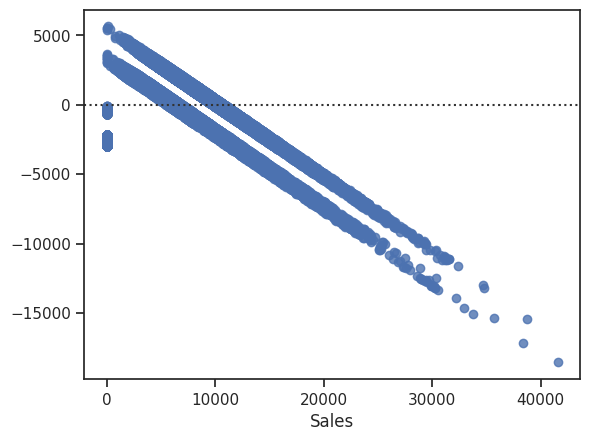

In [102]:
sns.residplot(x=y_test, y=y_pred_sklearn)

<Axes: xlabel='Sales'>

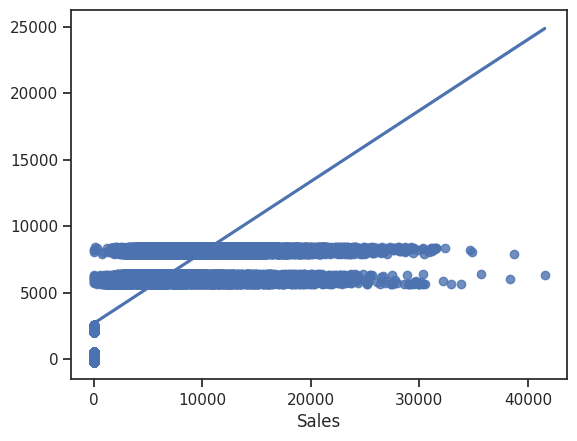

In [101]:
sns.regplot(x=y_test, y=y_pred_sklearn)


* MAE (Mean Absolute Error) => Ï†àÎåÄÍ∞í
* MSE (Mean Squared Error) => Ï†úÍ≥±
* RMSE (Root Mean Squared Error) => Ï†úÍ≥± => root
* RMSLE(Root Mean Squared Logarithmic Error) => Î°úÍ∑∏Î•º Ï∑®ÌïòÍ≥† RMSE

*** MAE(Mean Absolute Error) ***

* [Mean absolute error - Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)


$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

In [ ]:
error = abs(y_test - y_pred)
error.describe()

### 4.3 Î™®Îç∏ Ï†ÅÌï©ÎèÑ Í≤ÄÏ¶ù
- Í≤∞Ï†ï Í≥ÑÏàò(R¬≤), ÏûîÏ∞® Î∂ÑÏÑù Îì±

In [ ]:
# r2_score
r2_score(y_test, y_pred_sklearn)

In [97]:
# R¬≤ Í≥ÑÏÇ∞
r2 = r2_score(train_store['Sales'], predictions)
print(f'R¬≤: {r2}')

# MSE Í≥ÑÏÇ∞
mse = mean_squared_error(train_store['Sales'], predictions)
print(f'MSE: {mse}')

R¬≤: 0.1408722440110507
MSE: 8278673.075303546


In [99]:
# RMSE
np.sqrt(mse)
# RMSE
mse ** 0.5

2877.268335644687

In [103]:
# Î™®Îç∏ ÌèâÍ∞Ä - mean_squared_error
# mse_sklearn
mean_squared_error(y_test, y_pred_sklearn)

6908165.698865842

### 4.4  Îã§Ï§ëÍ≥µÏÑ†ÏÑ± ÏßÑÎã®
- VIF Îì±ÏùÑ ÌÜµÌïú ÎèÖÎ¶Ω Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ ÏùòÏ°¥ÏÑ± Í≤ÄÏÇ¨

In [98]:
# VIF Í≥ÑÏÇ∞
X = sm.add_constant(X_train)  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

         feature        VIF
0          const  25.545197
1          Promo   1.197696
2           Open   1.406982
3  SchoolHoliday   1.044952
4      DayOfWeek   1.571418
5          Store   1.000000



**ÌöåÍ∑Ä Í≥ÑÏàò (Coefficients)**

1Ô∏è‚É£ Promo: 2,071.77
- ÌîÑÎ°úÎ™®ÏÖòÏù¥ ÏßÑÌñâÎê† Îïå Îß§Ï∂úÏù¥ ÏïΩ 2,071.77ÎßåÌÅº Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Îäî ÌîÑÎ°úÎ™®ÏÖòÏù¥ Îß§Ï∂úÏóê Í∏çÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. \

2Ô∏è‚É£ Open: 5,855.88 \
- Îß§Ïû•Ïù¥ Ïó¥Î†§ ÏûàÏùÑ Îïå Îß§Ï∂úÏù¥ ÏïΩ 5,855.88ÎßåÌÅº Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Îäî Í∞ÄÏû• ÌÅ∞ Í∏çÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜåÎ°ú Î≥¥ÏûÖÎãàÎã§. \

3Ô∏è‚É£ SchoolHoliday: 68.18 \
- ÌïôÍµê Ìú¥ÏùºÏùº Í≤ΩÏö∞ Îß§Ï∂úÏù¥ ÏïΩ 68.18ÎßåÌÅº Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Îäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏûëÏùÄ ÏòÅÌñ•Î†•ÏùÑ Í∞ÄÏßëÎãàÎã§.

4Ô∏è‚É£ DayOfWeek: -107.69 \
- ÏöîÏùºÏù¥ ÌïòÎÇò Ï¶ùÍ∞ÄÌï† ÎïåÎßàÎã§ Îß§Ï∂úÏù¥ ÏïΩ 107.69ÎßåÌÅº Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ï£ºÏùò ÍπäÍ≤å Ìï¥ÏÑùÌï† ÌïÑÏöîÍ∞Ä ÏûàÎäîÎç∞, ÏöîÏùºÏù¥ Ïà´ÏûêÎ°ú ÌëúÌòÑÎê† Îïå 1Ïù¥ ÏùºÏöîÏùºÏù¥ÎùºÎ©¥, Ïù¥Îäî Ï£º ÌõÑÎ∞òÏúºÎ°ú Í∞àÏàòÎ°ù Îß§Ï∂úÏù¥ Í∞êÏÜåÌïúÎã§Îäî Í≤ÉÏùÑ ÎÇòÌÉÄÎÇº Ïàò ÏûàÏäµÎãàÎã§. \

5Ô∏è‚É£ Store: 0.061 \
- Îß§Ïû• IDÍ∞Ä 1 Ï¶ùÍ∞ÄÌï† ÎïåÎßàÎã§ Îß§Ï∂úÏù¥ ÏïΩ 0.061ÎßåÌÅº Ï¶ùÍ∞ÄÌïòÎäî Í≤ÉÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Ïù¥Îäî Îß§Ïö∞ ÏûëÏùÄ ÏòÅÌñ•Î†•ÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Îß§Ïû• ID ÏûêÏ≤¥Í∞Ä Îß§Ï∂úÏóê ÏßÅÏ†ëÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜåÎäî ÏïÑÎãê Ïàò ÏûàÏäµÎãàÎã§.


[Ï¢ÖÌï© Ìï¥ÏÑù]
- Ïù¥ Î™®Îç∏ÏùÄ Îß§Ïû•Ïùò Îß§Ï∂úÏùÑ ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú Ï¥àÍ∏∞ ÏãúÎèÑÎ°ú Î≥º Ïàò ÏûàÏùÑ Í±∞Îã§
- ÌîÑÎ°úÎ™®ÏÖòÍ≥º Îß§Ïû•Ïùò Ïò§Ìîà Ïó¨Î∂ÄÍ∞Ä Îß§Ï∂úÏóê Í∞ÄÏû• ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.
- Í∑∏Îü¨ÎÇò Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î™®Îç∏Ïùò ÏÑ§Î™ÖÎ†•Ïù¥ ÎÇÆÍ≥†, ÏòàÏ∏° Ï†ïÌôïÎèÑÏóê ÏûàÏñ¥ÏÑú Í∞úÏÑ†Ïùò Ïó¨ÏßÄÍ∞Ä ÎßéÏù¥ Î≥¥Ïù∏Îã§. Ï∂îÍ∞ÄÏ†ÅÏù∏ Î≥ÄÏàòÏùò Í≥†Î†§, Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤òÎ¶¨, Îã§Î•∏ Î™®Îç∏Ïùò ÏãúÎèÑ Îì±ÏùÑ ÌÜµÌï¥ ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÏãúÌÇ¨ Ïàò ÏûàÏùÑ Í≤ÉÏúºÎ°ú Í∏∞ÎåÄÎêúÎã§.